In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [25]:
cab = pd.read_csv('Cab_Data.csv')
customer = pd.read_csv('Customer_ID.csv')
city = pd.read_csv('City.csv')
transaction = pd.read_csv('Transaction_ID.csv')

In [26]:
cab.head(3)

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632


In [27]:
cab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int64  
 1   Date of Travel  359392 non-null  int64  
 2   Company         359392 non-null  object 
 3   City            359392 non-null  object 
 4   KM Travelled    359392 non-null  float64
 5   Price Charged   359392 non-null  float64
 6   Cost of Trip    359392 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 19.2+ MB


In [28]:
cab['Date of Travel'].min()

42371

In [29]:
cab['Date of Travel'].max()

43465

In [30]:
#highest number is 31/12/2018 and least number is 31/01/2016
import datetime
datetime.date(2016,1,31)-datetime.timedelta(days=42371)
datetime.date(1899,12,29)+datetime.timedelta(days=42371)

datetime.date(2016, 1, 1)

In [31]:
from datetime import datetime, timedelta
def dateReformation(dateInt):
    date=datetime.strftime(datetime(1899,12,29)+timedelta(days=dateInt),'%d-%m-%Y')
    return date

dateReformation(42371)

'01-01-2016'

In [32]:
cab['Date of Travel']=cab['Date of Travel'].apply(lambda dt: dateReformation(dt))

In [34]:
cab.describe(include='all')

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
count,3.593920e+05,359392,359392,359392,359392.000000,359392.000000,359392.000000
unique,NaN,1095,2,19,NaN,NaN,NaN
top,NaN,04-01-2018,Yellow Cab,NEW YORK NY,NaN,NaN,NaN
freq,NaN,2022,274681,99885,NaN,NaN,NaN
mean,1.022076e+07,NaN,NaN,NaN,22.567254,423.443311,286.190113
std,1.268058e+05,NaN,NaN,NaN,12.233526,274.378911,157.993661
min,1.000001e+07,NaN,NaN,NaN,1.900000,15.600000,19.000000
25%,1.011081e+07,NaN,NaN,NaN,12.000000,206.437500,151.200000
50%,1.022104e+07,NaN,NaN,NaN,22.440000,386.360000,282.480000
75%,1.033094e+07,NaN,NaN,NaN,32.960000,583.660000,413.683200


In [15]:
cab['Date of Travel'].min()

Timestamp('2016-01-01 00:00:00')

In [16]:
cab['Date of Travel'].max()

Timestamp('2018-12-30 00:00:00')

In [17]:
cabdate = cab.set_index('Date of Travel')

In [18]:
cabdate

,Transaction ID,Company,City,KM Travelled,Price Charged,Cost of Trip
Date of Travel,,,,,,
2016-07-01,10000011,Pink Cab,ATLANTA GA,30.45,370.95,313.6350
2016-05-01,10000012,Pink Cab,ATLANTA GA,28.62,358.52,334.8540
2016-01-01,10000013,Pink Cab,ATLANTA GA,9.04,125.20,97.6320
2016-06-01,10000014,Pink Cab,ATLANTA GA,33.17,377.40,351.6020
2016-02-01,10000015,Pink Cab,ATLANTA GA,8.73,114.62,97.7760
...,...,...,...,...,...,...
2018-07-01,10440101,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600
2018-03-01,10440104,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480
2018-04-01,10440105,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500


In [19]:
#cities
city.head()

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"


In [20]:
city.shape

(20, 3)

In [21]:
# displays unique cities names count
city.nunique()

City          20
Population    20
Users         20
dtype: int64

In [18]:
city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     object
 2   Users       20 non-null     object
dtypes: object(3)
memory usage: 608.0+ bytes


In [19]:
#replace "," with space for numbers in population
city['Population']=city['Population'].str.replace(",","")
city['Users']=city['Users'].str.replace(",","")
city

,City,Population,Users
0,NEW YORK NY,8405837,302149
1,CHICAGO IL,1955130,164468
2,LOS ANGELES CA,1595037,144132
3,MIAMI FL,1339155,17675
4,SILICON VALLEY,1177609,27247
5,ORANGE COUNTY,1030185,12994
6,SAN DIEGO CA,959307,69995
7,PHOENIX AZ,943999,6133
8,DALLAS TX,942908,22157
9,ATLANTA GA,814885,24701


In [20]:
#Converting population and users to numeric values
city['Population']=pd.to_numeric(city['Population'])
city['Users']=pd.to_numeric(city['Users'])
city

,City,Population,Users
0,NEW YORK NY,8405837,302149
1,CHICAGO IL,1955130,164468
2,LOS ANGELES CA,1595037,144132
3,MIAMI FL,1339155,17675
4,SILICON VALLEY,1177609,27247
5,ORANGE COUNTY,1030185,12994
6,SAN DIEGO CA,959307,69995
7,PHOENIX AZ,943999,6133
8,DALLAS TX,942908,22157
9,ATLANTA GA,814885,24701


In [21]:
city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     int64 
 2   Users       20 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 608.0+ bytes


In [22]:
#customers data 
customer.head()

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


In [23]:
customer.shape

(49171, 4)

In [24]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49171 entries, 0 to 49170
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer ID         49171 non-null  int64 
 1   Gender              49171 non-null  object
 2   Age                 49171 non-null  int64 
 3   Income (USD/Month)  49171 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [25]:
customer.describe()

,Customer ID,Age,Income (USD/Month)
count,49171.000000,49171.000000,49171.000000
mean,28398.252283,35.363121,15015.631856
std,17714.137333,12.599066,8002.208253
min,1.000000,18.000000,2000.000000
25%,12654.500000,25.000000,8289.500000
50%,27631.000000,33.000000,14656.000000
75%,43284.500000,42.000000,21035.000000
max,60000.000000,65.000000,35000.000000


In [26]:
#Transactions data
transaction.head()

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


In [27]:
transaction.shape

(440098, 3)

In [28]:
transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440098 entries, 0 to 440097
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Transaction ID  440098 non-null  int64 
 1   Customer ID     440098 non-null  int64 
 2   Payment_Mode    440098 non-null  object
dtypes: int64(2), object(1)
memory usage: 10.1+ MB


In [33]:
transaction.describe()

,Transaction ID,Customer ID
count,4.400980e+05,440098.000000
mean,1.022006e+07,23619.513120
std,1.270455e+05,21195.549816
min,1.000001e+07,1.000000
25%,1.011004e+07,3530.000000
50%,1.022006e+07,15168.000000
75%,1.033008e+07,43884.000000
max,1.044011e+07,60000.000000


In [34]:
#merging datas
#The city and cab dataset are related ,
#City Name in the city dataset is related to the city Name in the cab dataset.
merged_data=pd.merge(city,cab)

In [35]:
merged_data

,City,Population,Users,Transaction ID,Date of Travel,Company,KM Travelled,Price Charged,Cost of Trip
0,NEW YORK NY,8405837,302149,10000139,2016-07-01,Pink Cab,17.85,242.90,198.1350
1,NEW YORK NY,8405837,302149,10000140,2016-08-01,Pink Cab,25.30,407.21,255.5300
2,NEW YORK NY,8405837,302149,10000141,2016-05-01,Pink Cab,16.32,236.41,186.0480
3,NEW YORK NY,8405837,302149,10000142,2016-03-01,Pink Cab,12.43,194.61,144.1880
4,NEW YORK NY,8405837,302149,10000143,2016-08-01,Pink Cab,29.70,434.57,350.4600
...,...,...,...,...,...,...,...,...,...
359387,BOSTON MA,248968,80021,10437872,2018-03-01,Yellow Cab,1.96,26.23,25.1664
359388,BOSTON MA,248968,80021,10437873,2018-04-01,Yellow Cab,23.52,380.22,338.6880
359389,BOSTON MA,248968,80021,10437874,2018-05-01,Yellow Cab,29.10,393.33,391.1040
359390,BOSTON MA,248968,80021,10437875,2018-07-01,Yellow Cab,3.33,42.31,46.7532


In [36]:
#The customers dataset and transactions datasets are related through the Customer ID
merged_data = pd.merge(merged_data, transaction)

In [37]:
merged_data

,City,Population,Users,Transaction ID,Date of Travel,Company,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode
0,NEW YORK NY,8405837,302149,10000139,2016-07-01,Pink Cab,17.85,242.90,198.1350,2416,Cash
1,NEW YORK NY,8405837,302149,10000140,2016-08-01,Pink Cab,25.30,407.21,255.5300,2060,Card
2,NEW YORK NY,8405837,302149,10000141,2016-05-01,Pink Cab,16.32,236.41,186.0480,1451,Card
3,NEW YORK NY,8405837,302149,10000142,2016-03-01,Pink Cab,12.43,194.61,144.1880,1609,Card
4,NEW YORK NY,8405837,302149,10000143,2016-08-01,Pink Cab,29.70,434.57,350.4600,2927,Cash
...,...,...,...,...,...,...,...,...,...,...,...
359387,BOSTON MA,248968,80021,10437872,2018-03-01,Yellow Cab,1.96,26.23,25.1664,59926,Card
359388,BOSTON MA,248968,80021,10437873,2018-04-01,Yellow Cab,23.52,380.22,338.6880,57905,Card
359389,BOSTON MA,248968,80021,10437874,2018-05-01,Yellow Cab,29.10,393.33,391.1040,57906,Cash
359390,BOSTON MA,248968,80021,10437875,2018-07-01,Yellow Cab,3.33,42.31,46.7532,59259,Cash


In [38]:
#The tranactions dataset and the customer datasest are related through the Transaction ID
merged_data = pd.merge(merged_data,customer )

In [39]:
merged_data

,City,Population,Users,Transaction ID,Date of Travel,Company,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month)
0,NEW YORK NY,8405837,302149,10000139,2016-07-01,Pink Cab,17.85,242.90,198.1350,2416,Cash,Male,28,21399
1,NEW YORK NY,8405837,302149,10006684,2016-04-02,Yellow Cab,34.34,1099.35,482.1336,2416,Cash,Male,28,21399
2,NEW YORK NY,8405837,302149,10015798,2016-12-03,Yellow Cab,19.20,559.30,264.9600,2416,Card,Male,28,21399
3,NEW YORK NY,8405837,302149,10074689,2016-07-09,Yellow Cab,14.84,322.28,179.8608,2416,Card,Male,28,21399
4,NEW YORK NY,8405837,302149,10078883,2016-09-17,Pink Cab,37.08,728.27,393.0480,2416,Card,Male,28,21399
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,BOSTON MA,248968,80021,10359625,2018-10-08,Yellow Cab,33.04,459.13,444.0576,59005,Card,Female,24,13380
359388,BOSTON MA,248968,80021,10408986,2018-11-16,Yellow Cab,35.96,559.79,496.2480,59005,Card,Female,24,13380
359389,BOSTON MA,248968,80021,10350423,2018-07-21,Pink Cab,39.59,467.02,415.6950,59032,Card,Female,33,10658
359390,BOSTON MA,248968,80021,10353979,2018-07-27,Yellow Cab,6.90,78.86,86.1120,58491,Card,Female,27,27302


In [40]:
merged_data.columns=merged_data.columns.str.replace(" ","_")
merged_data

,City,Population,Users,Transaction_ID,Date_of_Travel,Company,KM_Travelled,Price_Charged,Cost_of_Trip,Customer_ID,Payment_Mode,Gender,Age,Income_(USD/Month)
0,NEW YORK NY,8405837,302149,10000139,2016-07-01,Pink Cab,17.85,242.90,198.1350,2416,Cash,Male,28,21399
1,NEW YORK NY,8405837,302149,10006684,2016-04-02,Yellow Cab,34.34,1099.35,482.1336,2416,Cash,Male,28,21399
2,NEW YORK NY,8405837,302149,10015798,2016-12-03,Yellow Cab,19.20,559.30,264.9600,2416,Card,Male,28,21399
3,NEW YORK NY,8405837,302149,10074689,2016-07-09,Yellow Cab,14.84,322.28,179.8608,2416,Card,Male,28,21399
4,NEW YORK NY,8405837,302149,10078883,2016-09-17,Pink Cab,37.08,728.27,393.0480,2416,Card,Male,28,21399
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,BOSTON MA,248968,80021,10359625,2018-10-08,Yellow Cab,33.04,459.13,444.0576,59005,Card,Female,24,13380
359388,BOSTON MA,248968,80021,10408986,2018-11-16,Yellow Cab,35.96,559.79,496.2480,59005,Card,Female,24,13380
359389,BOSTON MA,248968,80021,10350423,2018-07-21,Pink Cab,39.59,467.02,415.6950,59032,Card,Female,33,10658
359390,BOSTON MA,248968,80021,10353979,2018-07-27,Yellow Cab,6.90,78.86,86.1120,58491,Card,Female,27,27302


In [41]:
#find duplicates
merged_data[merged_data.duplicated()]

,City,Population,Users,Transaction_ID,Date_of_Travel,Company,KM_Travelled,Price_Charged,Cost_of_Trip,Customer_ID,Payment_Mode,Gender,Age,Income_(USD/Month)


In [42]:
merged_data.isnull().sum().sort_values(ascending=False)

City                  0
Population            0
Users                 0
Transaction_ID        0
Date_of_Travel        0
Company               0
KM_Travelled          0
Price_Charged         0
Cost_of_Trip          0
Customer_ID           0
Payment_Mode          0
Gender                0
Age                   0
Income_(USD/Month)    0
dtype: int64

In [43]:
#feature transformation
#returns month of date
merged_data['Month']=pd.DatetimeIndex(merged_data['Date_of_Travel']).month
#returns day of datetime
merged_data['Day']=pd.DatetimeIndex(merged_data['Date_of_Travel']).day
#returns year of datetime
merged_data['Year']=pd.DatetimeIndex(merged_data['Date_of_Travel']).year
#returns week of datetime
merged_data['Year_week']=pd.DatetimeIndex(merged_data['Date_of_Travel']).week
#returns day week of date time with Monday=0 and sunday=6
merged_data['Day_week']=pd.DatetimeIndex(merged_data['Date_of_Travel']).dayofweek
#returns quarter of date time
merged_data['Quarter']=pd.DatetimeIndex(merged_data['Date_of_Travel']).quarter

merged_data

<ipython-input-43-19b241e5b7eb>:9: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  merged_data['Year_week']=pd.DatetimeIndex(merged_data['Date_of_Travel']).week


,City,Population,Users,Transaction_ID,Date_of_Travel,Company,KM_Travelled,Price_Charged,Cost_of_Trip,Customer_ID,Payment_Mode,Gender,Age,Income_(USD/Month),Month,Day,Year,Year_week,Day_week,Quarter
0,NEW YORK NY,8405837,302149,10000139,2016-07-01,Pink Cab,17.85,242.90,198.1350,2416,Cash,Male,28,21399,7,1,2016,26,4,3
1,NEW YORK NY,8405837,302149,10006684,2016-04-02,Yellow Cab,34.34,1099.35,482.1336,2416,Cash,Male,28,21399,4,2,2016,13,5,2
2,NEW YORK NY,8405837,302149,10015798,2016-12-03,Yellow Cab,19.20,559.30,264.9600,2416,Card,Male,28,21399,12,3,2016,48,5,4
3,NEW YORK NY,8405837,302149,10074689,2016-07-09,Yellow Cab,14.84,322.28,179.8608,2416,Card,Male,28,21399,7,9,2016,27,5,3
4,NEW YORK NY,8405837,302149,10078883,2016-09-17,Pink Cab,37.08,728.27,393.0480,2416,Card,Male,28,21399,9,17,2016,37,5,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,BOSTON MA,248968,80021,10359625,2018-10-08,Yellow Cab,33.04,459.13,444.0576,59005,Card,Female,24,13380,10,8,2018,41,0,4
359388,BOSTON MA,248968,80021,10408986,2018-11-16,Yellow Cab,35.96,559.79,496.2480,59005,Card,Female,24,13380,11,16,2018,46,4,4
359389,BOSTON MA,248968,80021,10350423,2018-07-21,Pink Cab,39.59,467.02,415.6950,59032,Card,Female,33,10658,7,21,2018,29,5,3
359390,BOSTON MA,248968,80021,10353979,2018-07-27,Yellow Cab,6.90,78.86,86.1120,58491,Card,Female,27,27302,7,27,2018,30,4,3


In [44]:
#generating a new profit column from subtracting the price charged -cost of trip
merged_data['Profit']=merged_data['Price_Charged']-merged_data['Cost_of_Trip']
merged_data

,City,Population,Users,Transaction_ID,Date_of_Travel,Company,KM_Travelled,Price_Charged,Cost_of_Trip,Customer_ID,...,Gender,Age,Income_(USD/Month),Month,Day,Year,Year_week,Day_week,Quarter,Profit
0,NEW YORK NY,8405837,302149,10000139,2016-07-01,Pink Cab,17.85,242.90,198.1350,2416,...,Male,28,21399,7,1,2016,26,4,3,44.7650
1,NEW YORK NY,8405837,302149,10006684,2016-04-02,Yellow Cab,34.34,1099.35,482.1336,2416,...,Male,28,21399,4,2,2016,13,5,2,617.2164
2,NEW YORK NY,8405837,302149,10015798,2016-12-03,Yellow Cab,19.20,559.30,264.9600,2416,...,Male,28,21399,12,3,2016,48,5,4,294.3400
3,NEW YORK NY,8405837,302149,10074689,2016-07-09,Yellow Cab,14.84,322.28,179.8608,2416,...,Male,28,21399,7,9,2016,27,5,3,142.4192
4,NEW YORK NY,8405837,302149,10078883,2016-09-17,Pink Cab,37.08,728.27,393.0480,2416,...,Male,28,21399,9,17,2016,37,5,3,335.2220
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,BOSTON MA,248968,80021,10359625,2018-10-08,Yellow Cab,33.04,459.13,444.0576,59005,...,Female,24,13380,10,8,2018,41,0,4,15.0724
359388,BOSTON MA,248968,80021,10408986,2018-11-16,Yellow Cab,35.96,559.79,496.2480,59005,...,Female,24,13380,11,16,2018,46,4,4,63.5420
359389,BOSTON MA,248968,80021,10350423,2018-07-21,Pink Cab,39.59,467.02,415.6950,59032,...,Female,33,10658,7,21,2018,29,5,3,51.3250
359390,BOSTON MA,248968,80021,10353979,2018-07-27,Yellow Cab,6.90,78.86,86.1120,58491,...,Female,27,27302,7,27,2018,30,4,3,-7.2520


In [45]:
#Column created to check profit from the ride or a loss (1 for profit and 0 for loss)
merged_data['Profited']=merged_data['Profit'].apply(lambda x: 1 if x>1 else 0)
merged_data

,City,Population,Users,Transaction_ID,Date_of_Travel,Company,KM_Travelled,Price_Charged,Cost_of_Trip,Customer_ID,...,Age,Income_(USD/Month),Month,Day,Year,Year_week,Day_week,Quarter,Profit,Profited
0,NEW YORK NY,8405837,302149,10000139,2016-07-01,Pink Cab,17.85,242.90,198.1350,2416,...,28,21399,7,1,2016,26,4,3,44.7650,1
1,NEW YORK NY,8405837,302149,10006684,2016-04-02,Yellow Cab,34.34,1099.35,482.1336,2416,...,28,21399,4,2,2016,13,5,2,617.2164,1
2,NEW YORK NY,8405837,302149,10015798,2016-12-03,Yellow Cab,19.20,559.30,264.9600,2416,...,28,21399,12,3,2016,48,5,4,294.3400,1
3,NEW YORK NY,8405837,302149,10074689,2016-07-09,Yellow Cab,14.84,322.28,179.8608,2416,...,28,21399,7,9,2016,27,5,3,142.4192,1
4,NEW YORK NY,8405837,302149,10078883,2016-09-17,Pink Cab,37.08,728.27,393.0480,2416,...,28,21399,9,17,2016,37,5,3,335.2220,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,BOSTON MA,248968,80021,10359625,2018-10-08,Yellow Cab,33.04,459.13,444.0576,59005,...,24,13380,10,8,2018,41,0,4,15.0724,1
359388,BOSTON MA,248968,80021,10408986,2018-11-16,Yellow Cab,35.96,559.79,496.2480,59005,...,24,13380,11,16,2018,46,4,4,63.5420,1
359389,BOSTON MA,248968,80021,10350423,2018-07-21,Pink Cab,39.59,467.02,415.6950,59032,...,33,10658,7,21,2018,29,5,3,51.3250,1
359390,BOSTON MA,248968,80021,10353979,2018-07-27,Yellow Cab,6.90,78.86,86.1120,58491,...,27,27302,7,27,2018,30,4,3,-7.2520,0


In [46]:
#create a column to generate the price/km and profit/km of each ride
merged_data['Price/KM']=merged_data['Price_Charged']/merged_data['KM_Travelled']
merged_data['Profit/KM']=merged_data['Profit']/merged_data['KM_Travelled']
merged_data

,City,Population,Users,Transaction_ID,Date_of_Travel,Company,KM_Travelled,Price_Charged,Cost_of_Trip,Customer_ID,...,Month,Day,Year,Year_week,Day_week,Quarter,Profit,Profited,Price/KM,Profit/KM
0,NEW YORK NY,8405837,302149,10000139,2016-07-01,Pink Cab,17.85,242.90,198.1350,2416,...,7,1,2016,26,4,3,44.7650,1,13.607843,2.507843
1,NEW YORK NY,8405837,302149,10006684,2016-04-02,Yellow Cab,34.34,1099.35,482.1336,2416,...,4,2,2016,13,5,2,617.2164,1,32.013687,17.973687
2,NEW YORK NY,8405837,302149,10015798,2016-12-03,Yellow Cab,19.20,559.30,264.9600,2416,...,12,3,2016,48,5,4,294.3400,1,29.130208,15.330208
3,NEW YORK NY,8405837,302149,10074689,2016-07-09,Yellow Cab,14.84,322.28,179.8608,2416,...,7,9,2016,27,5,3,142.4192,1,21.716981,9.596981
4,NEW YORK NY,8405837,302149,10078883,2016-09-17,Pink Cab,37.08,728.27,393.0480,2416,...,9,17,2016,37,5,3,335.2220,1,19.640507,9.040507
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,BOSTON MA,248968,80021,10359625,2018-10-08,Yellow Cab,33.04,459.13,444.0576,59005,...,10,8,2018,41,0,4,15.0724,1,13.896186,0.456186
359388,BOSTON MA,248968,80021,10408986,2018-11-16,Yellow Cab,35.96,559.79,496.2480,59005,...,11,16,2018,46,4,4,63.5420,1,15.567019,1.767019
359389,BOSTON MA,248968,80021,10350423,2018-07-21,Pink Cab,39.59,467.02,415.6950,59032,...,7,21,2018,29,5,3,51.3250,1,11.796413,1.296413
359390,BOSTON MA,248968,80021,10353979,2018-07-27,Yellow Cab,6.90,78.86,86.1120,58491,...,7,27,2018,30,4,3,-7.2520,0,11.428986,-1.051014


In [47]:
# consider only numerical data
#select all the numerical columns
numerical_cols=merged_data.select_dtypes(exclude='object')
numerical_cols

,Population,Users,Transaction_ID,Date_of_Travel,KM_Travelled,Price_Charged,Cost_of_Trip,Customer_ID,Age,Income_(USD/Month),Month,Day,Year,Year_week,Day_week,Quarter,Profit,Profited,Price/KM,Profit/KM
0,8405837,302149,10000139,2016-07-01,17.85,242.90,198.1350,2416,28,21399,7,1,2016,26,4,3,44.7650,1,13.607843,2.507843
1,8405837,302149,10006684,2016-04-02,34.34,1099.35,482.1336,2416,28,21399,4,2,2016,13,5,2,617.2164,1,32.013687,17.973687
2,8405837,302149,10015798,2016-12-03,19.20,559.30,264.9600,2416,28,21399,12,3,2016,48,5,4,294.3400,1,29.130208,15.330208
3,8405837,302149,10074689,2016-07-09,14.84,322.28,179.8608,2416,28,21399,7,9,2016,27,5,3,142.4192,1,21.716981,9.596981
4,8405837,302149,10078883,2016-09-17,37.08,728.27,393.0480,2416,28,21399,9,17,2016,37,5,3,335.2220,1,19.640507,9.040507
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,248968,80021,10359625,2018-10-08,33.04,459.13,444.0576,59005,24,13380,10,8,2018,41,0,4,15.0724,1,13.896186,0.456186
359388,248968,80021,10408986,2018-11-16,35.96,559.79,496.2480,59005,24,13380,11,16,2018,46,4,4,63.5420,1,15.567019,1.767019
359389,248968,80021,10350423,2018-07-21,39.59,467.02,415.6950,59032,33,10658,7,21,2018,29,5,3,51.3250,1,11.796413,1.296413
359390,248968,80021,10353979,2018-07-27,6.90,78.86,86.1120,58491,27,27302,7,27,2018,30,4,3,-7.2520,0,11.428986,-1.051014


In [48]:
#drop the date of Travel column
date_cols=numerical_cols.pop('Date_of_Travel')
date_cols

0        2016-07-01
1        2016-04-02
2        2016-12-03
3        2016-07-09
4        2016-09-17
            ...    
359387   2018-10-08
359388   2018-11-16
359389   2018-07-21
359390   2018-07-27
359391   2018-12-19
Name: Date_of_Travel, Length: 359392, dtype: datetime64[ns]

In [49]:
#consider only object columns
object_cols=merged_data.select_dtypes(include='object')
object_cols

,City,Company,Payment_Mode,Gender
0,NEW YORK NY,Pink Cab,Cash,Male
1,NEW YORK NY,Yellow Cab,Cash,Male
2,NEW YORK NY,Yellow Cab,Card,Male
3,NEW YORK NY,Yellow Cab,Card,Male
4,NEW YORK NY,Pink Cab,Card,Male
...,...,...,...,...
359387,BOSTON MA,Yellow Cab,Card,Female
359388,BOSTON MA,Yellow Cab,Card,Female
359389,BOSTON MA,Pink Cab,Card,Female
359390,BOSTON MA,Yellow Cab,Card,Female


In [50]:
# visualise data
from scipy import stats
import pprint
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

sns.set_theme()

In [51]:
#function to get quartile and descriptive statistics
def numericalAnalysis(datar,col):
    print(f"Quantile statistics of the column:{col}")
    print(f"Quantile1 is: {np.quantile(datar[col],.25)} ")
    print(f"Quantile2 is: {np.quantile(datar[col],.50)}")
    print(f"Quantile3 is: {np.quantile(datar[col],.75)}\n")
    print(f"The skewness of the column is {stats.skew(datar[col])}")
    print(f"The kurtosis of the column is {stats.kurtosis(datar[col])}\n")
    pprint.pprint(merged_data[col].describe())
    print("\n")

In [52]:
numericalAnalysis(numerical_cols,"KM_Travelled")

Quantile statistics of the column:KM_Travelled
Quantile1 is: 12.0 
Quantile2 is: 22.44
Quantile3 is: 32.96

The skewness of the column is 0.055778674935348826
The kurtosis of the column is -1.126876373765414

count    359392.000000
mean         22.567254
std          12.233526
min           1.900000
25%          12.000000
50%          22.440000
75%          32.960000
max          48.000000
Name: KM_Travelled, dtype: float64




In [53]:
#function to plot a boxplot and histogram of the distribution

def vizHist(datar,col,c):# plt.figure(figsize=(10,8))
    sns.histplot(x=datar[col],bins=40 , color=c ,kde=True )
    plt.title("Histogram of {}".format(col), fontsize=20)
    plt.ylabel('Frequency')
    plt.xlabel(col)

def boxPlot(datar,col):# plt.figure(figsize=(10,8))
    print("Boxplot of {}".format(col))
    sns.boxplot(datar[col])

<AxesSubplot:xlabel='KM_Travelled', ylabel='Density'>

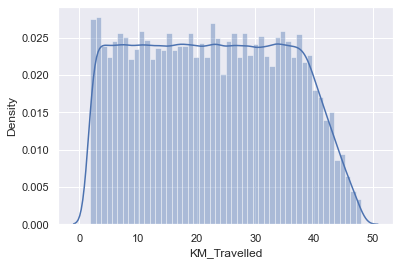

In [54]:
sns.distplot(merged_data['KM_Travelled'])

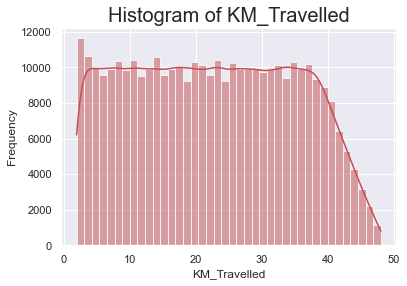

In [55]:
vizHist(numerical_cols,"KM_Travelled",'r')

Boxplot of KM_Travelled


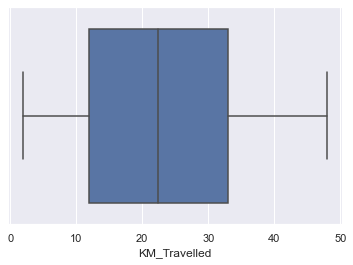

In [56]:
boxPlot(numerical_cols,'KM_Travelled')

In [57]:
#check for pricecharged
numericalAnalysis(merged_data,"Price_Charged")

Quantile statistics of the column:Price_Charged
Quantile1 is: 206.4375 
Quantile2 is: 386.36
Quantile3 is: 583.66

The skewness of the column is 0.8737578448085501
The kurtosis of the column is 0.7476083770138611

count    359392.000000
mean        423.443311
std         274.378911
min          15.600000
25%         206.437500
50%         386.360000
75%         583.660000
max        2048.030000
Name: Price_Charged, dtype: float64




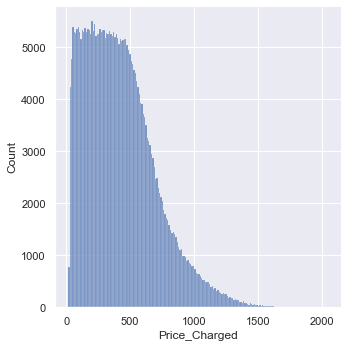

In [58]:
sns.displot(merged_data['Price_Charged'])

Boxplot of Price_Charged


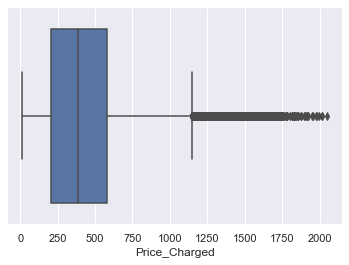

In [59]:
boxPlot(merged_data,'Price_Charged')

In [60]:
numericalAnalysis(merged_data,"Cost_of_Trip")

Quantile statistics of the column:Cost_of_Trip
Quantile1 is: 151.2 
Quantile2 is: 282.48
Quantile3 is: 413.6832

The skewness of the column is 0.13795748511098016
The kurtosis of the column is -1.0122353643193267

count    359392.000000
mean        286.190113
std         157.993661
min          19.000000
25%         151.200000
50%         282.480000
75%         413.683200
max         691.200000
Name: Cost_of_Trip, dtype: float64




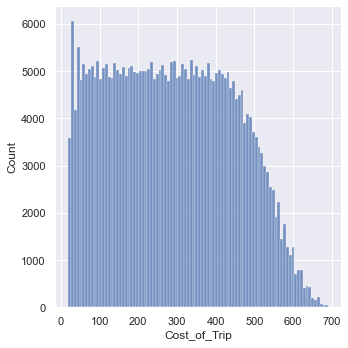

In [61]:
sns.displot(merged_data['Cost_of_Trip'])

Boxplot of Cost_of_Trip


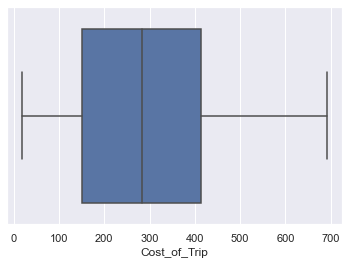

In [62]:
boxPlot(merged_data,'Cost_of_Trip')

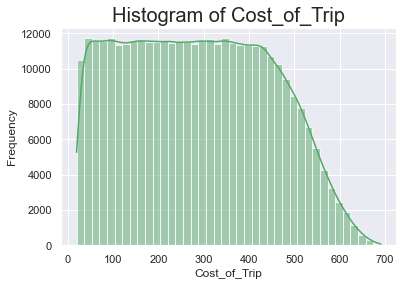

In [63]:
vizHist(merged_data,"Cost_of_Trip",'g')

In [64]:
# Age
numericalAnalysis(merged_data,"Age")

Quantile statistics of the column:Age
Quantile1 is: 25.0 
Quantile2 is: 33.0
Quantile3 is: 42.0

The skewness of the column is 0.6853359221403659
The kurtosis of the column is -0.458407095222376

count    359392.000000
mean         35.336705
std          12.594234
min          18.000000
25%          25.000000
50%          33.000000
75%          42.000000
max          65.000000
Name: Age, dtype: float64




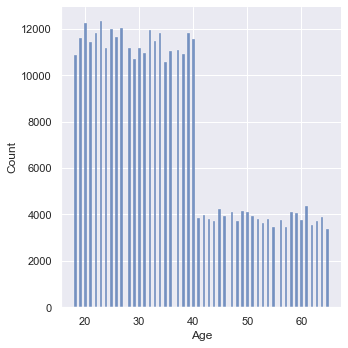

In [65]:
sns.displot(merged_data['Age'])

Boxplot of Age


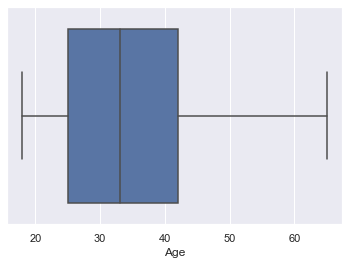

In [66]:
boxPlot(merged_data,'Age')

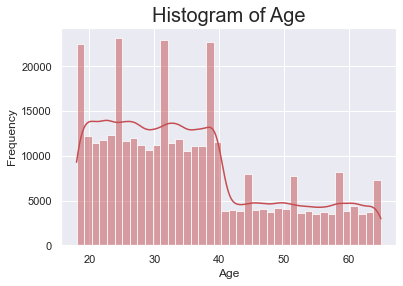

In [67]:
vizHist(merged_data,'Age','r')

In [68]:
#income
numericalAnalysis(merged_data,'Income_(USD/Month)')

Quantile statistics of the column:Income_(USD/Month)
Quantile1 is: 8424.0 
Quantile2 is: 14685.0
Quantile3 is: 21035.0

The skewness of the column is 0.30956094781266125
The kurtosis of the column is -0.660493222082108

count    359392.000000
mean      15048.822937
std        7969.409482
min        2000.000000
25%        8424.000000
50%       14685.000000
75%       21035.000000
max       35000.000000
Name: Income_(USD/Month), dtype: float64




Boxplot of Income_(USD/Month)


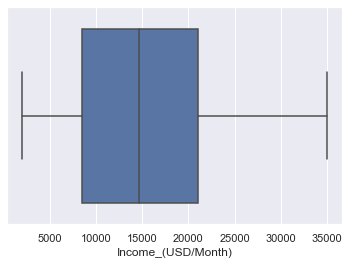

In [69]:
boxPlot(merged_data,'Income_(USD/Month)')

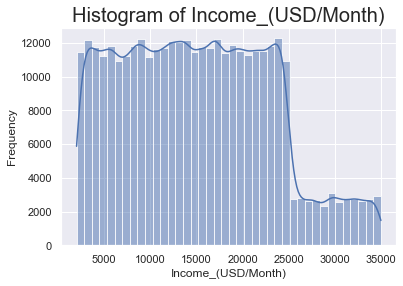

In [70]:
vizHist(merged_data, 'Income_(USD/Month)','b')

In [71]:
#population
numericalAnalysis(city,'Population')

Quantile statistics of the column:Population
Quantile1 is: 608637.25 
Quantile2 is: 784559.0
Quantile3 is: 1067041.0

The skewness of the column is 3.748639561312251
The kurtosis of the column is 13.026845373545925

count    3.593920e+05
mean     3.132198e+06
std      3.315194e+06
min      2.489680e+05
25%      6.712380e+05
50%      1.595037e+06
75%      8.405837e+06
max      8.405837e+06
Name: Population, dtype: float64




Boxplot of Population


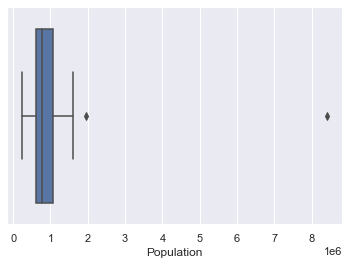

In [72]:
boxPlot(city, 'Population')

<AxesSubplot:xlabel='Population', ylabel='Density'>

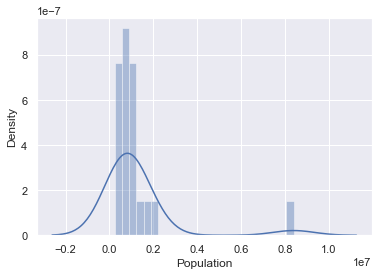

In [73]:
sns.distplot(city['Population'])

In [74]:
numericalAnalysis(city,'Users')

Quantile statistics of the column:Users
Quantile1 is: 11633.25 
Quantile2 is: 23429.0
Quantile3 is: 91766.0

The skewness of the column is 1.5528253542318422
The kurtosis of the column is 1.4798770017919862

count    359392.000000
mean     158365.582267
std      100850.051020
min        3643.000000
25%       80021.000000
50%      144132.000000
75%      302149.000000
max      302149.000000
Name: Users, dtype: float64




<AxesSubplot:xlabel='Users', ylabel='Density'>

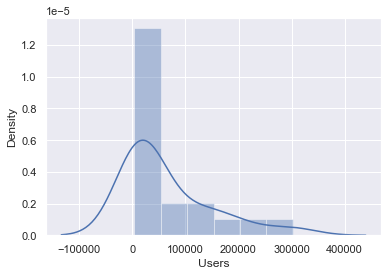

In [75]:
sns.distplot(city['Users'])

Boxplot of Users


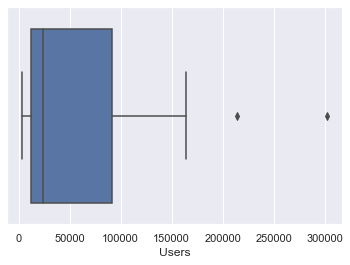

In [76]:
boxPlot(city,'Users')

In [77]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359392 entries, 0 to 359391
Data columns (total 24 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   City                359392 non-null  object        
 1   Population          359392 non-null  int64         
 2   Users               359392 non-null  int64         
 3   Transaction_ID      359392 non-null  int64         
 4   Date_of_Travel      359392 non-null  datetime64[ns]
 5   Company             359392 non-null  object        
 6   KM_Travelled        359392 non-null  float64       
 7   Price_Charged       359392 non-null  float64       
 8   Cost_of_Trip        359392 non-null  float64       
 9   Customer_ID         359392 non-null  int64         
 10  Payment_Mode        359392 non-null  object        
 11  Gender              359392 non-null  object        
 12  Age                 359392 non-null  int64         
 13  Income_(USD/Month)  359392 no

Text(0.5, 1.0, 'Week Analysis')

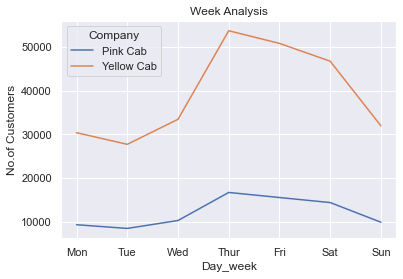

In [78]:
plotter = merged_data.groupby(["Day_week","Company"]).Transaction_ID.count()
plotter.unstack().plot(kind="line")
plt.xticks(range(0,7),["Mon","Tue","Wed","Thur","Fri","Sat","Sun"])
plt.ylabel("No.of Customers")
plt.title("Week Analysis")

Text(0.5, 1.0, 'Day analysis')

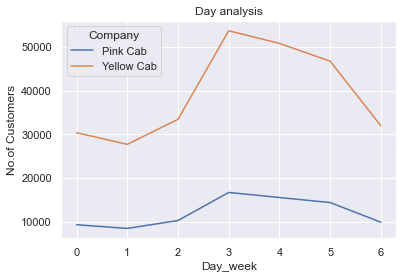

In [79]:
plot1= merged_data.groupby(["Day","Company"]).Transaction_ID.count()
plotter.unstack().plot(kind="line")
plt.xticks()
plt.ylabel("No.of Customers")
plt.title("Day analysis")

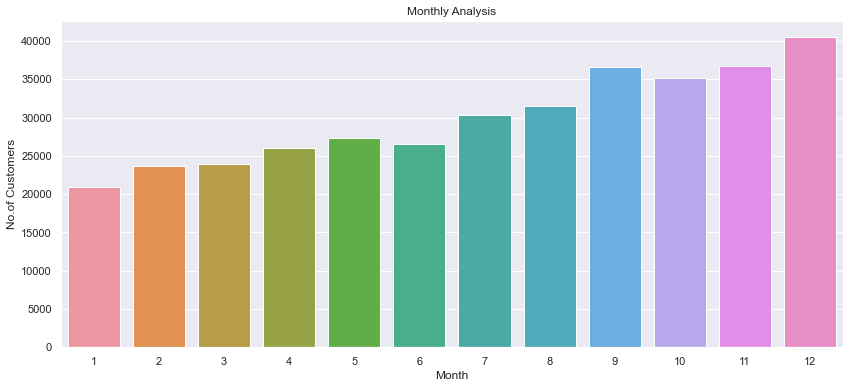

In [80]:
plot1=merged_data.groupby("Month").Transaction_ID.count()
plt.figure(figsize=(14,6))
sns.barplot(x=plot1.index,y=plot1.values)
plt.title("Monthly Analysis")
plt.ylabel("No.of Customers")
plt.show()

Text(0.5, 1.0, 'Monthly Analysis per Company')

<Figure size 1008x432 with 0 Axes>

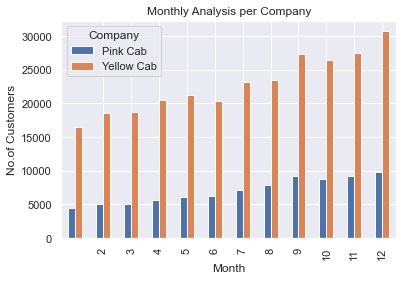

In [81]:
plotter = merged_data.groupby(["Month","Company"]).Transaction_ID.count()
plt.figure(figsize=(14,6))
plotter.unstack().plot(kind="bar")
plt.xticks(range(1,12))
plt.ylabel("No.of Customers")
plt.title("Monthly Analysis per Company")

Text(0.5, 1.0, 'Monthly Analysis per Company')

<Figure size 1440x720 with 0 Axes>

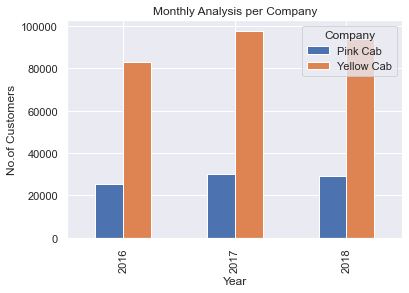

In [82]:
plotter = merged_data.groupby(["Year","Company"]).Transaction_ID.count()
plt.figure(figsize=(20,10))
plotter.unstack().plot(kind="bar")
plt.ylabel("No.of Customers")
plt.title("Monthly Analysis per Company")

<AxesSubplot:xlabel='Year', ylabel='Users'>

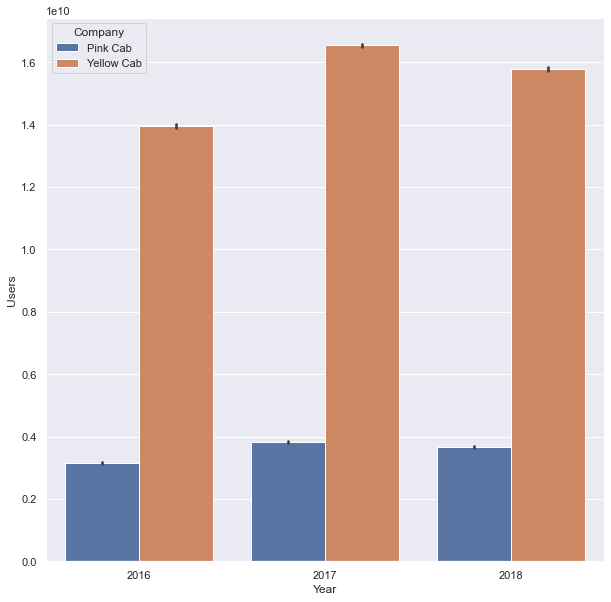

In [183]:
#Year vs Users vs Company
plt.figure(figsize=(10,10))
plt.xticks()
sns.barplot(x=merged_data['Year'],y=merged_data['Users'],hue=merged_data['Company'],estimator=sum)

In [83]:
merged_data.groupby(["Year","Company"]).Transaction_ID.count()

Year  Company   
2016  Pink Cab      25285
      Yellow Cab    82937
2017  Pink Cab      30205
      Yellow Cab    97759
2018  Pink Cab      29221
      Yellow Cab    93985
Name: Transaction_ID, dtype: int64

Text(0, 0.5, 'Number Of Customers')

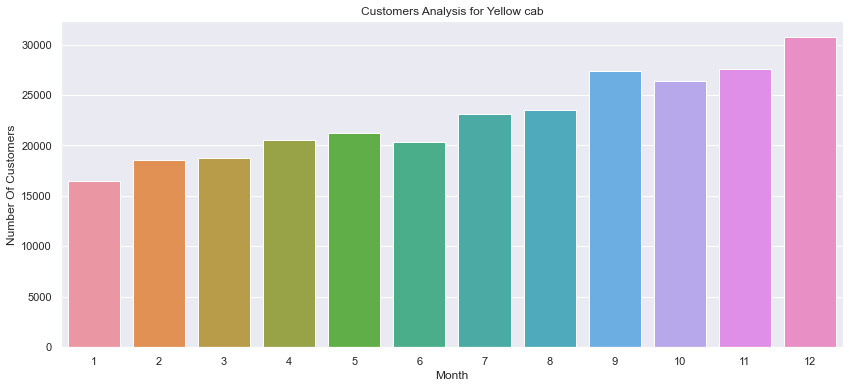

In [84]:
#yellow cab monthly transaction id count is plotted
plot= merged_data[merged_data.Company == "Yellow Cab"].groupby("Month").Transaction_ID.count()
plt.figure(figsize=(14,6))
sns.barplot(x=plot.index,y=plot.values)
plt.title("Customers Analysis for Yellow cab")
plt.ylabel("Number Of Customers")

Text(0, 0.5, 'Number Of Rides')

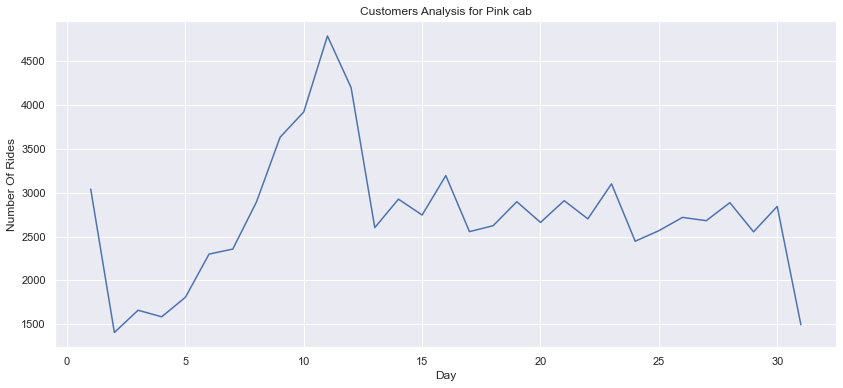

In [85]:
plot1= merged_data[merged_data.Company == "Pink Cab"].groupby("Day").Transaction_ID.count()
plt.figure(figsize=(14,6))
sns.lineplot(x=plot1.index,y=plot1.values)
plt.title("Customers Analysis for Pink cab")
plt.ylabel("Number Of Rides")

Text(0.5, 1.0, 'Yearly Customer distribution')

<Figure size 7200x3600 with 0 Axes>

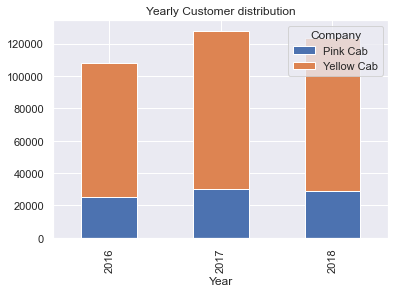

In [86]:
plot2 =merged_data.groupby(["Year","Company"]).Transaction_ID.count()
plt.figure(figsize=(100,50))
plot2.unstack().plot(kind="bar" ,stacked=True)
plt.title("Yearly Customer distribution")

Text(0, 0.5, 'Number Of Customers')

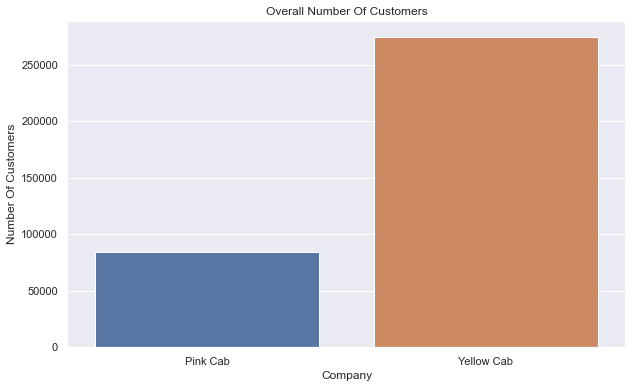

In [87]:
#Company Analysis
plot3=merged_data.groupby("Company").Transaction_ID.count()
plt.figure(figsize=(10,6))
sns.barplot(x=plot3.index,y=plot3.values)
plt.title("Overall Number Of Customers")
plt.ylabel("Number Of Customers")

In [88]:
plot4= merged_data[merged_data.Company=="Pink Cab"].groupby("Month").Transaction_ID.count()
print("Pink cab monthly transaction info :", plot4)
plot5= merged_data[merged_data.Company=="Yellow Cab"].groupby("Month").Transaction_ID.count()
print("Yellow cab monthly transaction info :", plot5)

Pink cab monthly transaction info : Month
1     4447
2     5111
3     5129
4     5589
5     6116
6     6255
7     7176
8     7930
9     9185
10    8808
11    9177
12    9788
Name: Transaction_ID, dtype: int64
Yellow cab monthly transaction info : Month
1     16446
2     18592
3     18753
4     20495
5     21253
6     20354
7     23157
8     23527
9     27359
10    26412
11    27557
12    30776
Name: Transaction_ID, dtype: int64


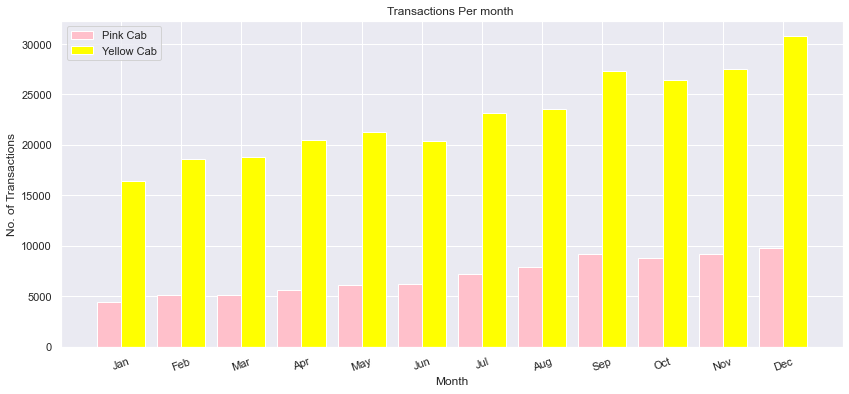

In [89]:
plt.figure(figsize=(14,6))
ax =plt.subplot(111)
ax.bar(plot4.index-0.2,plot4.values,width=0.4,color="Pink",align="center",label="Pink Cab")
ax.bar(plot5.index+0.2,plot5.values,width=0.4,color="Yellow",align="center",label="Yellow Cab")
plt.title("Transactions Per month ")
plt.ylabel("No. of Transactions")
#locs, labels = plt.xticks()
plt.xticks(np.arange(1,13),["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"],rotation=20)
plt.xlabel("Month")
plt.legend()

Text(0, 0.5, 'Number Of Customers')

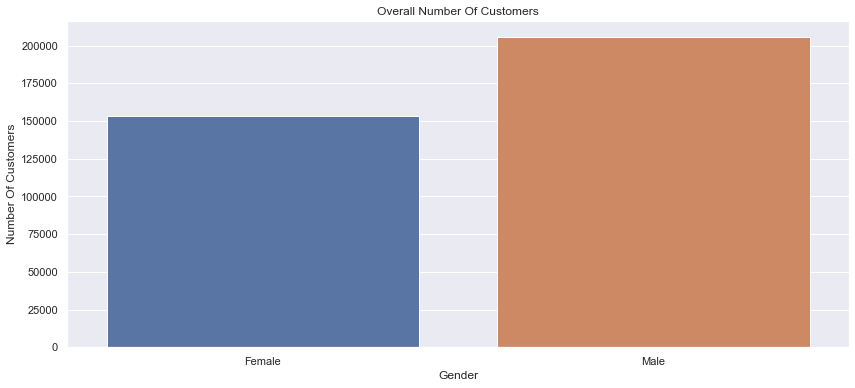

In [90]:
#customer gender analysis
#Company Analysis
plot3=merged_data.groupby("Gender").Transaction_ID.count()
plt.figure(figsize=(14,6))
sns.barplot(x=plot3.index,y=plot3.values)
plt.title("Overall Number Of Customers")
plt.ylabel("Number Of Customers")

<AxesSubplot:xlabel='Company', ylabel='Users'>

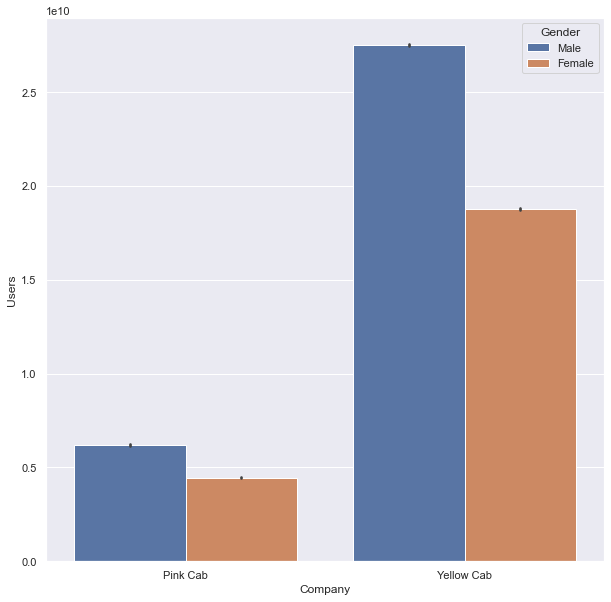

In [184]:
plt.figure(figsize=(10,10))
plt.xticks()
sns.barplot(x=merged_data['Company'],y=merged_data['Users'],hue=merged_data['Gender'],estimator=sum)

Text(0, 0.5, 'Number Of Customers')

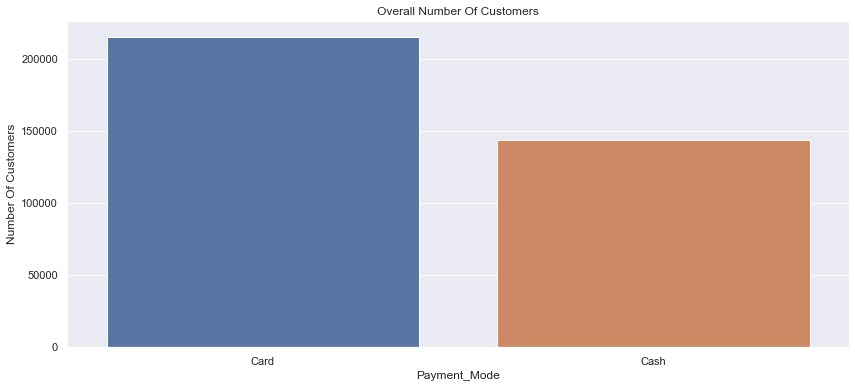

In [91]:
#Company Analysis
plot3=merged_data.groupby("Payment_Mode").Transaction_ID.count()
plt.figure(figsize=(14,6))
sns.barplot(x=plot3.index,y=plot3.values)
plt.title("Overall Number Of Customers")
plt.ylabel("Number Of Customers")

<AxesSubplot:xlabel='Population', ylabel='Users'>

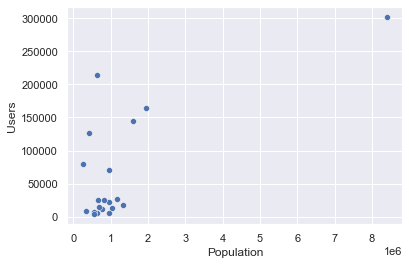

In [92]:
sns.scatterplot(y=city['Users'],x=city['Population'])

In [93]:
merged_data.Profit.max()

1463.9660000000003

In [94]:
merged_data.Profit.min()

-220.06

<AxesSubplot:xlabel='KM_Travelled', ylabel='Profit'>

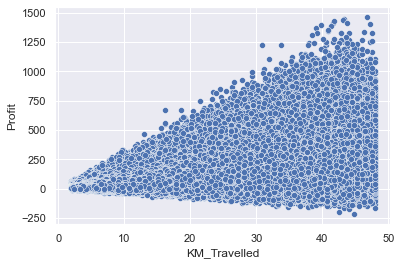

In [95]:
sns.scatterplot(x=merged_data['KM_Travelled'],y=merged_data["Profit"])

<AxesSubplot:xlabel='KM_Travelled', ylabel='Profit'>

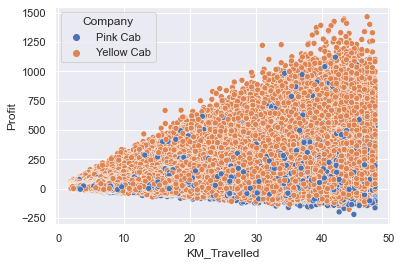

In [96]:
sns.scatterplot(x=merged_data['KM_Travelled'],y=merged_data["Profit"],hue=merged_data['Company'])

In [97]:
merged_data.groupby(['Gender'])['Income_(USD/Month)'].mean()

Gender
Female    15057.968954
Male      15042.005799
Name: Income_(USD/Month), dtype: float64

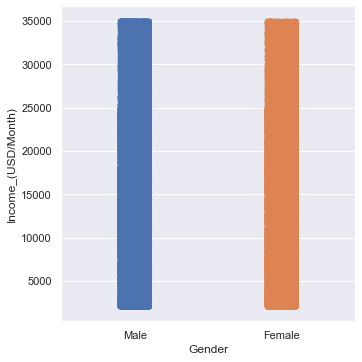

In [98]:
sns.catplot(x="Gender", y="Income_(USD/Month)", data=merged_data)

<AxesSubplot:xlabel='Age', ylabel='Income_(USD/Month)'>

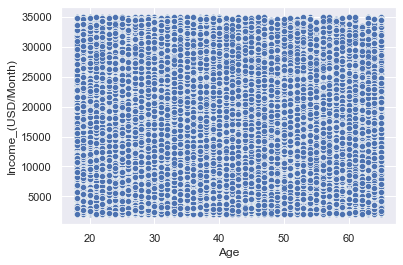

In [99]:
#Age vs Income
sns.scatterplot(x=merged_data["Age"],y=merged_data["Income_(USD/Month)"])

<AxesSubplot:xlabel='Income_(USD/Month)', ylabel='KM_Travelled'>

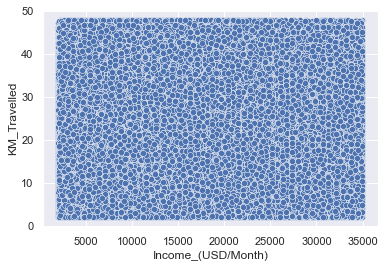

In [100]:
#income vs kms travelled
sns.scatterplot(x=merged_data["Income_(USD/Month)"],y=merged_data['KM_Travelled'])

In [101]:
#Quarter vs profit
merged_data.groupby(['Quarter'])["Profit"].mean()

Quarter
1    151.700074
2    151.489706
3    126.398459
4    127.817317
Name: Profit, dtype: float64

In [102]:
merged_data.groupby(['Quarter','Year'])["Profit"].sum()

Quarter  Year
1        2016    3.345439e+06
         2017    3.930155e+06
         2018    3.112524e+06
2        2016    3.755886e+06
         2017    4.523872e+06
         2018    3.848811e+06
3        2016    3.819115e+06
         2017    4.889992e+06
         2018    3.720159e+06
4        2016    4.893329e+06
         2017    5.135350e+06
         2018    4.353070e+06
Name: Profit, dtype: float64

In [103]:
#Quarters vs KM Travelled
merged_data.groupby(['Quarter'])['KM_Travelled'].median()

Quarter
1    22.47
2    22.40
3    22.44
4    22.54
Name: KM_Travelled, dtype: float64

In [104]:
merged_data.groupby(['Quarter'])['KM_Travelled'].mean()

Quarter
1    22.595628
2    22.506439
3    22.584680
4    22.578030
Name: KM_Travelled, dtype: float64

In [105]:
merged_data.groupby(['Quarter'])['KM_Travelled'].sum()

Quarter
1    1547303.43
2    1801910.51
3    2220841.89
4    2540434.75
Name: KM_Travelled, dtype: float64

Text(0.5, 1.0, 'Number of KM Travelled per Quarter')

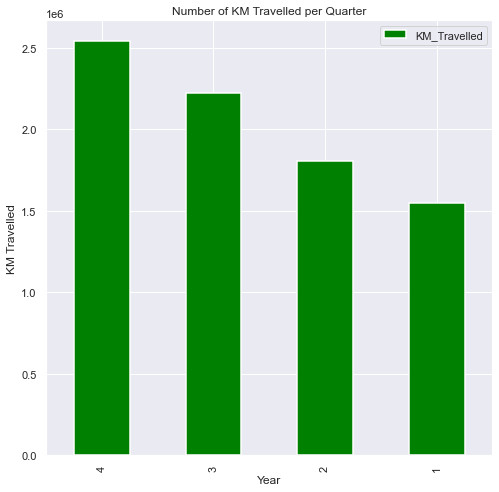

In [106]:
quarterDistance=merged_data.groupby('Quarter')['KM_Travelled'].sum()
quarterDistance=pd.DataFrame(quarterDistance)
quarterDistance=quarterDistance.sort_values(by='KM_Travelled',ascending=False)
# plt.figure(figsize=(10,10))

quarterDistance.plot.bar(color='green',linewidth=1.5,figsize=(8,8))
plt.xticks()
plt.ylabel('KM Travelled')
plt.xlabel("Year")
plt.title("Number of KM Travelled per Quarter")

In [107]:
merged_data.groupby(['KM_Travelled','Company'])['Users'].count()

KM_Travelled  Company   
1.90          Pink Cab       76
              Yellow Cab    263
1.92          Pink Cab       80
              Yellow Cab    295
1.94          Pink Cab       75
                           ... 
47.20         Yellow Cab    298
47.60         Pink Cab       76
              Yellow Cab    305
48.00         Pink Cab       85
              Yellow Cab    281
Name: Users, Length: 1748, dtype: int64

In [108]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359392 entries, 0 to 359391
Data columns (total 24 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   City                359392 non-null  object        
 1   Population          359392 non-null  int64         
 2   Users               359392 non-null  int64         
 3   Transaction_ID      359392 non-null  int64         
 4   Date_of_Travel      359392 non-null  datetime64[ns]
 5   Company             359392 non-null  object        
 6   KM_Travelled        359392 non-null  float64       
 7   Price_Charged       359392 non-null  float64       
 8   Cost_of_Trip        359392 non-null  float64       
 9   Customer_ID         359392 non-null  int64         
 10  Payment_Mode        359392 non-null  object        
 11  Gender              359392 non-null  object        
 12  Age                 359392 non-null  int64         
 13  Income_(USD/Month)  359392 no

In [109]:
merged_data.groupby(['Day_week'])['KM_Travelled'].median()

Day_week
0    22.44
1    22.42
2    22.44
3    22.54
4    22.47
5    22.54
6    22.23
Name: KM_Travelled, dtype: float64

In [110]:
merged_data.groupby(['Day_week'])['KM_Travelled'].sum()

Day_week
0     898042.64
1     814431.66
2     985329.32
3    1591113.06
4    1499764.13
5    1381515.46
6     940294.31
Name: KM_Travelled, dtype: float64

Text(0.5, 1.0, 'Number of KM Travelled per Day')

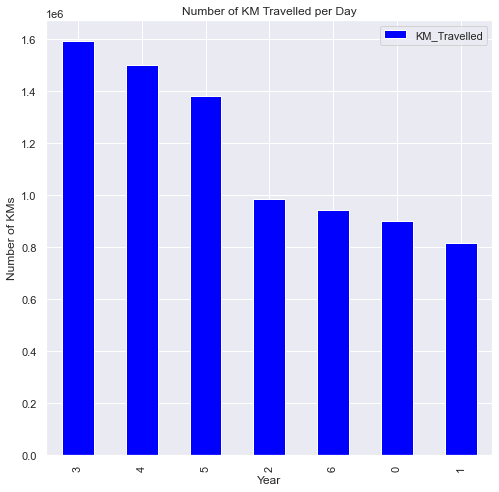

In [111]:
dayDistance=merged_data.groupby('Day_week')['KM_Travelled'].sum()
dayDistance=pd.DataFrame(dayDistance)
dayDistance=dayDistance.sort_values(by='KM_Travelled',ascending=False)
# plt.figure(figsize=(10,10))

dayDistance.plot.bar(color='blue',linewidth=1,figsize=(8,8))
plt.xticks()
plt.ylabel('Number of KMs')
plt.xlabel("Year")
plt.title("Number of KM Travelled per Day")

<AxesSubplot:xlabel='Day_week', ylabel='Profit'>

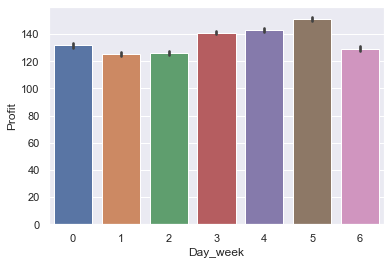

In [112]:
sns.barplot(x="Day_week", y="Profit", data=merged_data)

In [113]:
merged_data.groupby(['Day_week','Users'])['Profit'].sum()

Day_week  Users 
0         3643      1.122942e+04
          5712      1.247483e+04
          6133      2.289137e+04
          7044      1.338539e+04
          9270      1.690573e+04
                        ...     
6         80021     1.978381e+05
          127001    3.707922e+05
          144132    4.791196e+05
          164468    3.752916e+05
          302149    3.059343e+06
Name: Profit, Length: 133, dtype: float64

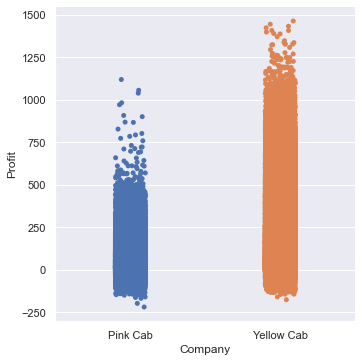

In [114]:
sns.catplot(x="Company", y="Profit", data=merged_data)

In [115]:
merged_data.groupby(['Company'])['Profit'].mean()

Company
Pink Cab       62.652174
Yellow Cab    160.259986
Name: Profit, dtype: float64

In [116]:
merged_data.groupby(['Company'])['Profit'].sum()

Company
Pink Cab      5.307328e+06
Yellow Cab    4.402037e+07
Name: Profit, dtype: float64

In [117]:
#monthly profit
merged_data.groupby(['Month'])['Profit'].sum()

Month
1     3.163165e+06
2     3.732548e+06
3     3.492405e+06
4     3.910198e+06
5     4.337438e+06
6     3.880933e+06
7     3.761782e+06
8     3.609168e+06
9     5.058316e+06
10    4.319899e+06
11    4.550712e+06
12    5.511138e+06
Name: Profit, dtype: float64

<AxesSubplot:xlabel='Year', ylabel='Profit'>

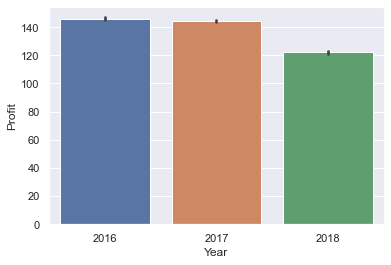

In [118]:
sns.barplot(x="Year",y= 'Profit', data = merged_data)

<AxesSubplot:xlabel='Month', ylabel='Profit'>

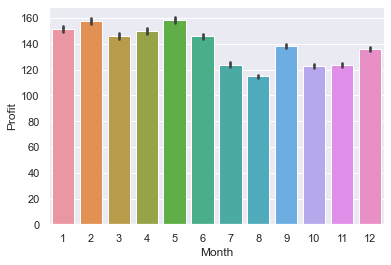

In [119]:
sns.barplot(x="Month", y="Profit", data=merged_data)

Text(0.5, 1.0, 'Revenue Per Month')

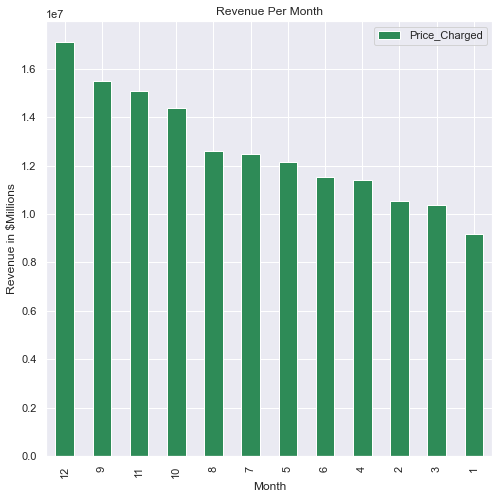

In [120]:
monthRev=merged_data.groupby('Month')['Price_Charged'].sum()
monthRev=pd.DataFrame(monthRev)
monthRev=monthRev.sort_values(by='Price_Charged',ascending=False)
# plt.figure(figsize=(10,10))

monthRev.plot.bar(color='seagreen',linewidth=1,figsize=(8,8))
plt.xticks(rotation=90)
plt.ylabel('Revenue in $Millions')
plt.xlabel("Month")
plt.title("Revenue Per Month")

Text(0.5, 1.0, 'Revenue Per Month for YellowCab')

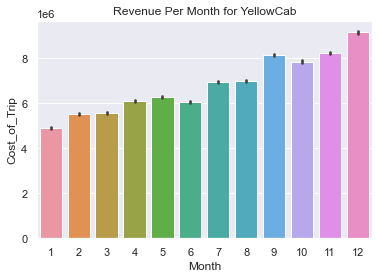

In [121]:
#revenue permonth for yellow cab
yellowCab=merged_data[merged_data['Company']=="Yellow Cab"]
sns.barplot(x=yellowCab['Month'],y=yellowCab['Cost_of_Trip'],estimator=sum)
plt.title("Revenue Per Month for YellowCab")

Text(0.5, 1.0, 'Revenue Per Month for Pink cab')

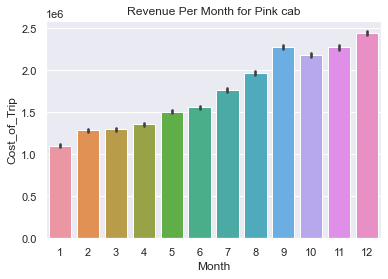

In [122]:
#revenue per month for pink cab
PinkCab=merged_data[merged_data['Company']=="Pink Cab"]
sns.barplot(x=PinkCab['Month'],y=PinkCab['Cost_of_Trip'],estimator=sum)
plt.title("Revenue Per Month for Pink cab")

In [123]:
#city vs profit
merged_data.groupby(['City'])['Profit'].sum().sort_values(ascending=False)

City
NEW YORK NY       2.796256e+07
LOS ANGELES CA    4.411709e+06
WASHINGTON DC     3.492870e+06
CHICAGO IL        3.387313e+06
BOSTON MA         1.768719e+06
SAN DIEGO CA      1.587163e+06
SILICON VALLEY    1.316705e+06
DALLAS TX         1.128733e+06
ATLANTA GA        8.424329e+05
MIAMI FL          7.583012e+05
SEATTLE WA        6.046849e+05
AUSTIN TX         5.267010e+05
ORANGE COUNTY     4.570019e+05
DENVER CO         3.975850e+05
PHOENIX AZ        1.929409e+05
NASHVILLE TN      1.495322e+05
TUCSON AZ         1.402607e+05
SACRAMENTO CA     1.173262e+05
PITTSBURGH PA     8.516596e+04
Name: Profit, dtype: float64

In [124]:
merged_data.groupby(['Company'])['Profit/KM'].sum().sort_values(ascending=False)

Company
Yellow Cab    1.951748e+06
Pink Cab      2.346417e+05
Name: Profit/KM, dtype: float64

Text(0.5, 1.0, 'Proifits per each City')

<Figure size 576x576 with 0 Axes>

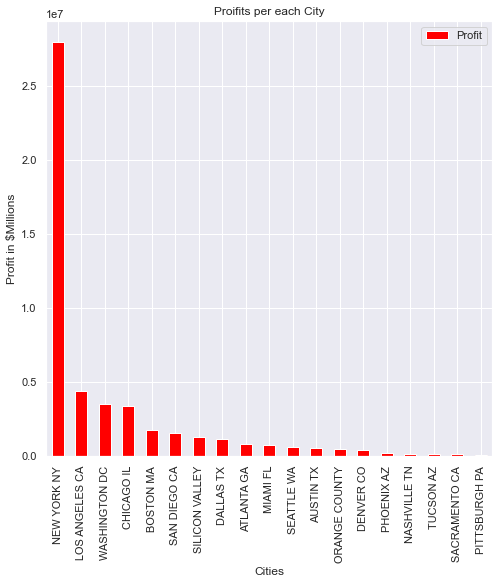

In [125]:
cityProfit=merged_data.groupby('City').Profit.sum()
cityProfit=pd.DataFrame(cityProfit)
cityProfit=cityProfit.sort_values(by='Profit',ascending=False)
plt.figure(figsize=(8,8))

cityProfit.plot.bar(color='red',linewidth=1,figsize=(8,8))
plt.xticks()
plt.ylabel('Profit in $Millions')
plt.xlabel("Cities")
plt.title("Proifits per each City")

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]),
 [Text(0, 0, 'NEW YORK NY'),
  Text(1, 0, 'CHICAGO IL'),
  Text(2, 0, 'LOS ANGELES CA'),
  Text(3, 0, 'MIAMI FL'),
  Text(4, 0, 'SILICON VALLEY'),
  Text(5, 0, 'ORANGE COUNTY'),
  Text(6, 0, 'SAN DIEGO CA'),
  Text(7, 0, 'PHOENIX AZ'),
  Text(8, 0, 'DALLAS TX'),
  Text(9, 0, 'ATLANTA GA'),
  Text(10, 0, 'DENVER CO'),
  Text(11, 0, 'AUSTIN TX'),
  Text(12, 0, 'SEATTLE WA'),
  Text(13, 0, 'TUCSON AZ'),
  Text(14, 0, 'SACRAMENTO CA'),
  Text(15, 0, 'PITTSBURGH PA'),
  Text(16, 0, 'WASHINGTON DC'),
  Text(17, 0, 'NASHVILLE TN'),
  Text(18, 0, 'BOSTON MA')])

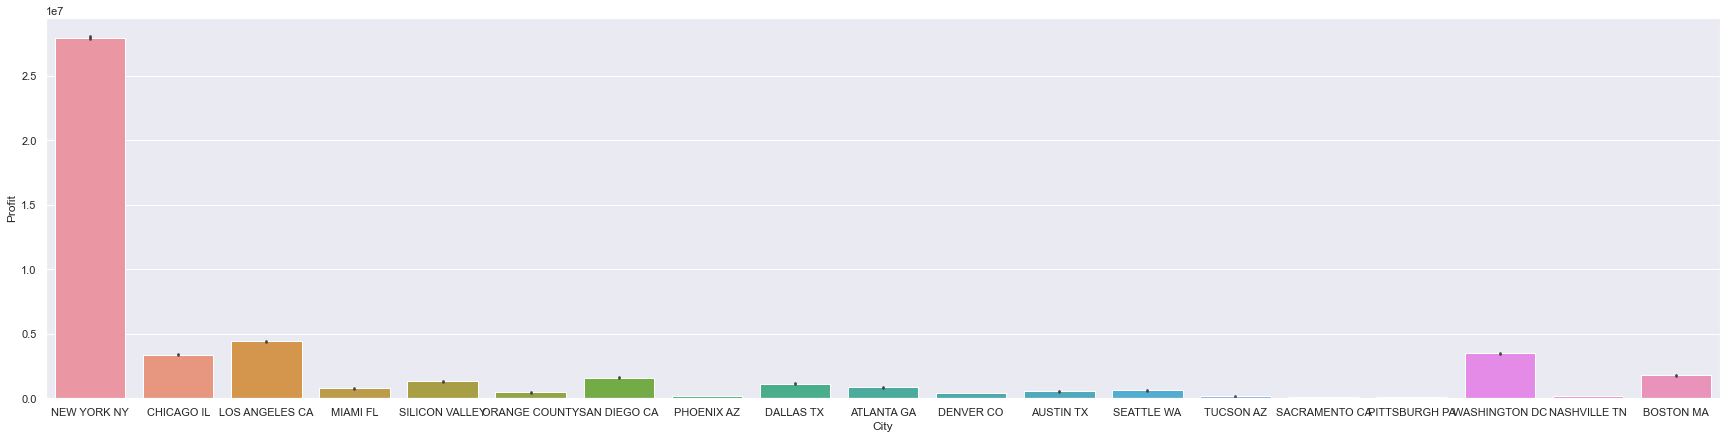

In [126]:
plt.figure(figsize=(30,7))
sns.barplot(x=merged_data["City"],y=merged_data['Profit'],estimator=sum)
plt.xticks()

Text(0.5, 1.0, 'Profits Per Month for Yellow Company')

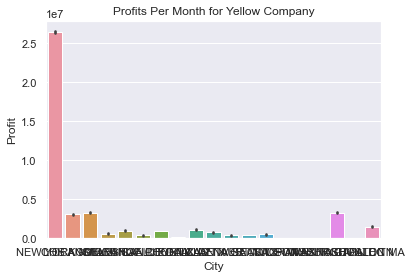

In [127]:
#profit per city for each company
sns.barplot(x=yellowCab['City'],y=yellowCab['Profit'],estimator=sum)
plt.xticks()
plt.title("Profits Per Month for Yellow Company")

Text(0.5, 1.0, 'Profit for Pink Company')

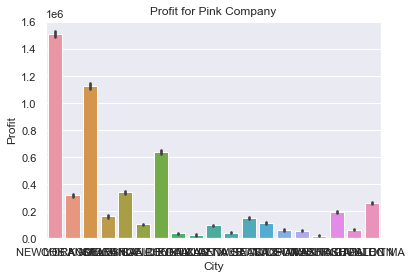

In [128]:
sns.barplot(x=PinkCab['City'],y=PinkCab['Profit'],estimator=sum)
plt.xticks()
plt.title("Profit for Pink Company")

In [129]:
merged_data.groupby(['Year'])['Profit'].sum()

Year
2016    1.581377e+07
2017    1.847937e+07
2018    1.503456e+07
Name: Profit, dtype: float64

In [130]:
data2016=merged_data.loc[merged_data['Year']==2016]
data2017=merged_data.loc[merged_data['Year']==2017]
data2018=merged_data.loc[merged_data['Year']==2018]
profit2016=round(data2016['Profit'].sum())
profit2017=round(data2017['Profit'].sum())
profit2018=round(data2018['Profit'].sum())
# sns.lineplot(x=data['Year'],y=data['Profit'])

In [131]:
pd1=pd.DataFrame(data=[profit2018,profit2017,profit2016],columns=["Profit"],index=[2018,2017,2016])
pd1

,Profit
2018,15034565
2017,18479368
2016,15813769


<AxesSubplot:ylabel='Profit'>

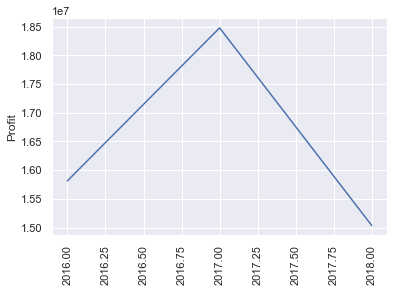

In [132]:
plt.xticks(rotation=90)
sns.lineplot(y=pd1['Profit'],x=pd1.index)

Text(0.5, 1.0, 'Proifits per Year')

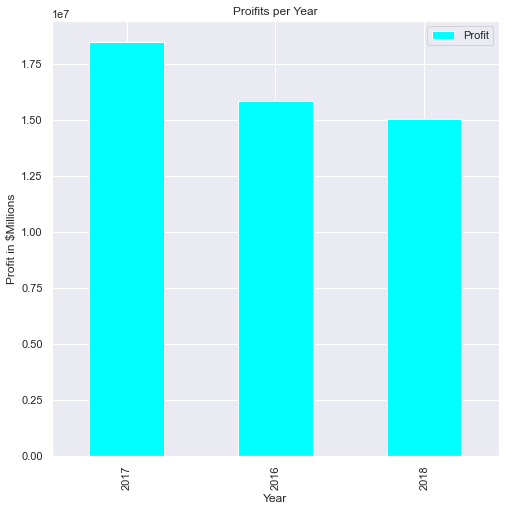

In [133]:
yearlyProfit=merged_data.groupby('Year').Profit.sum()
yearlyProfit=pd.DataFrame(yearlyProfit)
yearlyProfit=yearlyProfit.sort_values(by='Profit',ascending=False)
# plt.figure(figsize=(10,10))

yearlyProfit.plot.bar(color='cyan',linewidth=1,figsize=(8,8))
plt.xticks()
plt.ylabel('Profit in $Millions')
plt.xlabel("Year")
plt.title("Proifits per Year")

Text(0.5, 1.0, 'Proifits per Year')

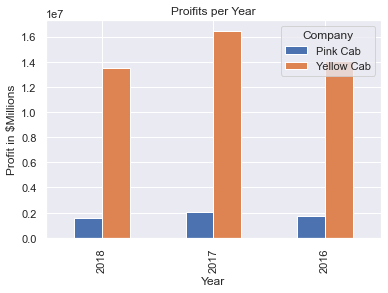

In [134]:
yearlyProfit=merged_data.groupby(['Year','Company'])['Profit'].sum().unstack().fillna(0)
yearlyProfit=pd.DataFrame(yearlyProfit)
yearlyProfit=yearlyProfit.sort_values(by='Year',ascending=False)
# plt.figure(figsize=(10,10))

yearlyProfit.plot(kind= 'bar')
plt.xticks()
plt.ylabel('Profit in $Millions')
plt.xlabel("Year")
plt.title("Proifits per Year")

Text(0.5, 1.0, 'Avg Proifits per KM')

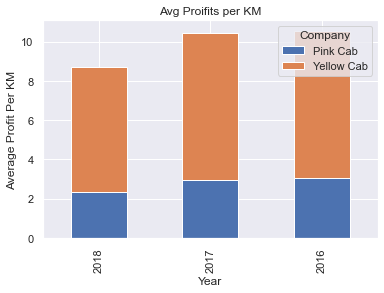

In [135]:
yearlyProfit=merged_data.groupby(['Year','Company'])['Profit/KM'].mean().unstack().fillna(0)
yearlyProfit=pd.DataFrame(yearlyProfit)
yearlyProfit=yearlyProfit.sort_values(by='Year',ascending=False)
# plt.figure(figsize=(10,10))

yearlyProfit.plot(kind= 'bar',stacked=True)
plt.xticks()
plt.ylabel('Average Profit Per KM')
plt.xlabel("Year")
plt.title("Avg Proifits per KM")

Text(0.5, 1.0, 'Proifits per Year per Gender for each company')

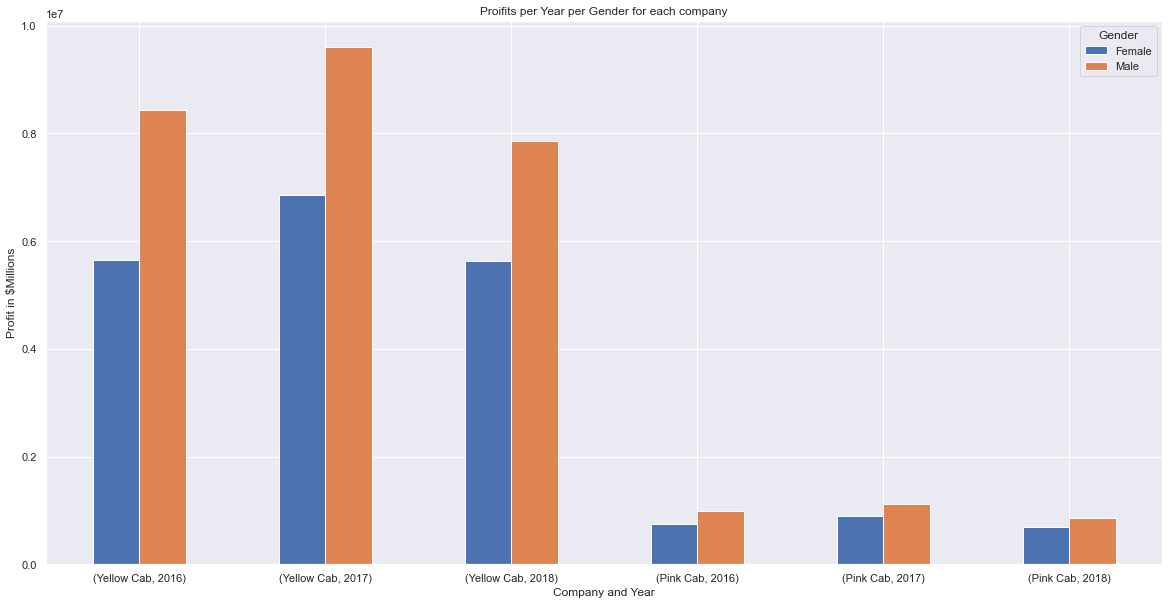

In [136]:
yearlyProfit=merged_data.groupby(['Company','Year','Gender'])['Profit'].sum().unstack().fillna(0)
yearlyProfit=pd.DataFrame(yearlyProfit)
yearlyProfit=yearlyProfit.sort_values(by='Company',ascending=False)


yearlyProfit.plot(kind= 'bar',figsize=(20,10))
plt.xticks(rotation = 360)
plt.ylabel('Profit in $Millions')
plt.xlabel("Company and Year")
plt.title("Proifits per Year per Gender for each company")

Text(0.5, 1.0, 'Customer base analysis Year per Gender for each company')

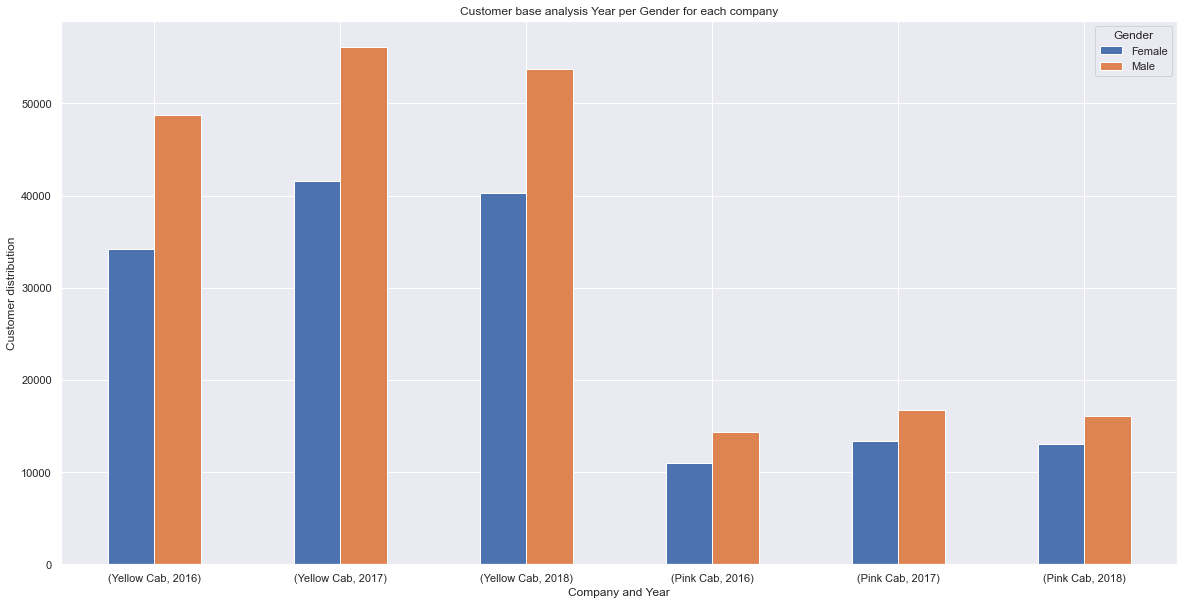

In [137]:
yearlyProfit=merged_data.groupby(['Company','Year','Gender'])['Gender'].count().unstack().fillna(0)
yearlyProfit=pd.DataFrame(yearlyProfit)
yearlyProfit=yearlyProfit.sort_values(by='Company',ascending=False)


yearlyProfit.plot(kind= 'bar',figsize=(20,10))
plt.xticks(rotation = 360)
plt.ylabel('Customer distribution')
plt.xlabel("Company and Year")
plt.title("Customer base analysis Year per Gender for each company")

In [138]:
merged_data.groupby(['Company','Payment_Mode'])['Profit'].sum()

Company     Payment_Mode
Pink Cab    Card            3.180603e+06
            Cash            2.126726e+06
Yellow Cab  Card            2.636208e+07
            Cash            1.765830e+07
Name: Profit, dtype: float64

<AxesSubplot:xlabel='Payment_Mode', ylabel='Profit'>

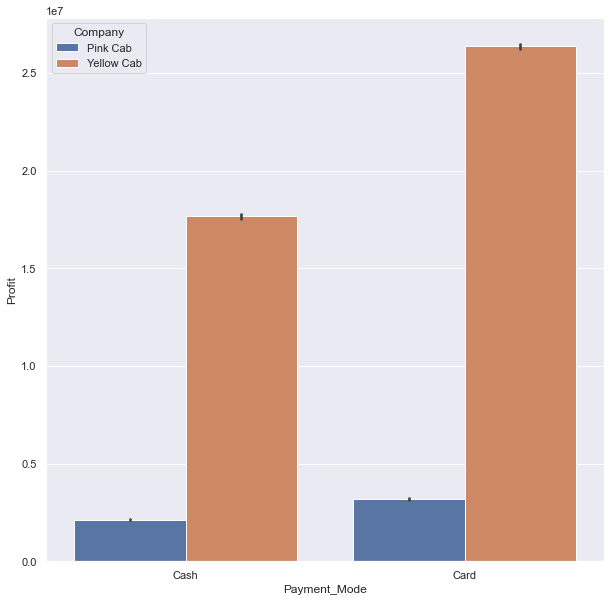

In [139]:
#profit vs card or cash
plt.figure(figsize=(10,10))
plt.xticks()
merged_data.groupby(['Company','Payment_Mode'])["Profit"].sum()
sns.barplot(x=merged_data['Payment_Mode'],y=merged_data['Profit'],hue=merged_data['Company'],estimator=sum)

<AxesSubplot:xlabel='Quarter', ylabel='Profit'>

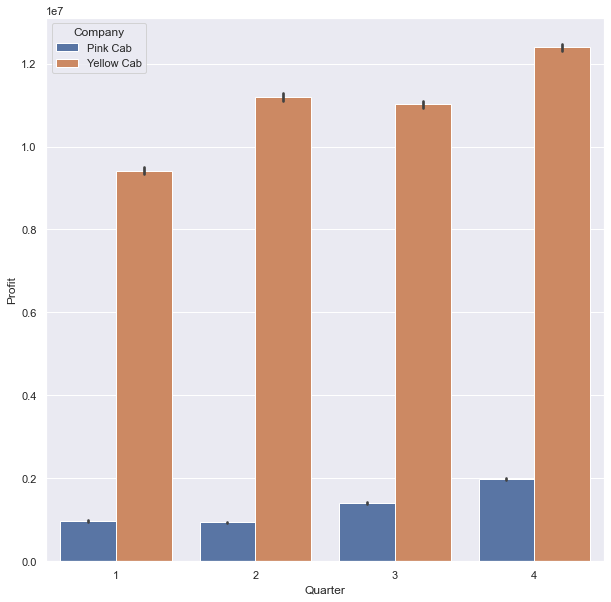

In [140]:
#profit vs Quarter 
plt.figure(figsize=(10,10))
plt.xticks()
merged_data.groupby(['Company','Quarter'])["Profit"].sum()
sns.barplot(x=merged_data['Quarter'],y=merged_data['Profit'],hue=merged_data['Company'],estimator=sum)

<AxesSubplot:xlabel='Day_week', ylabel='Profit'>

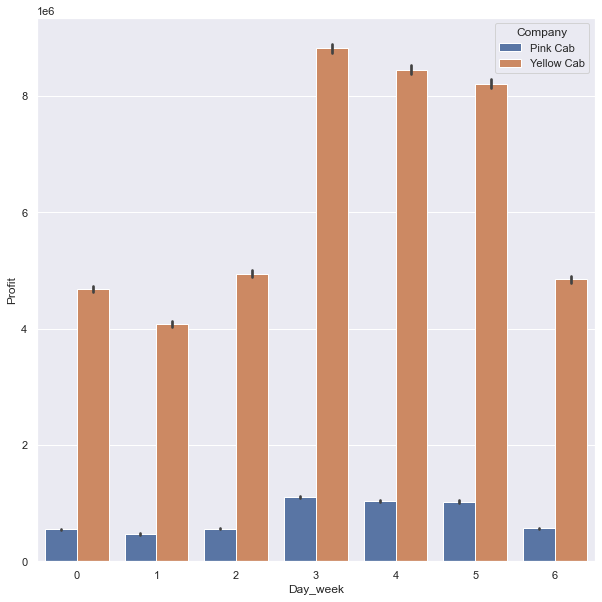

In [141]:
#profit vs Quarter 
plt.figure(figsize=(10,10))
plt.xticks()
merged_data.groupby(['Company','Day_week'])["Profit"].sum()
sns.barplot(x=merged_data['Day_week'],y=merged_data['Profit'],hue=merged_data['Company'],estimator=sum)

<AxesSubplot:xlabel='Company', ylabel='Income_(USD/Month)'>

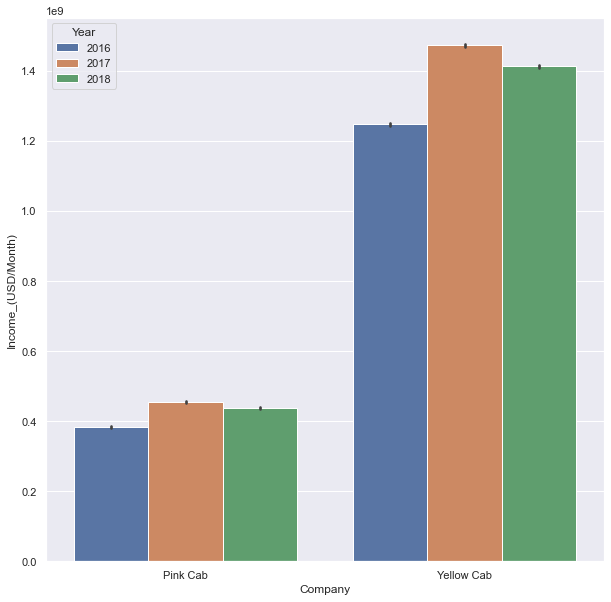

In [188]:
#Company vs Income vs Year
plt.figure(figsize=(10,10))
plt.xticks()
sns.barplot(x=merged_data['Company'],y=merged_data['Income_(USD/Month)'],hue=merged_data['Year'],estimator=sum)

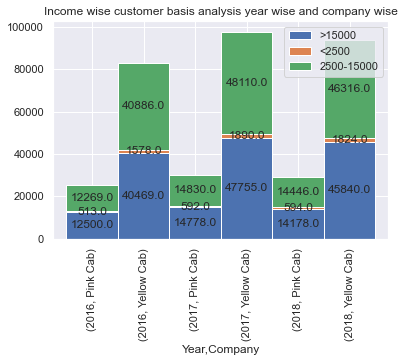

In [189]:
import pandas as pd
data3 = merged_data[(merged_data['Income_(USD/Month)']>2500) & (merged_data['Income_(USD/Month)']<15000)].groupby(['Year','Company'])['Company'].count()

data1 = merged_data[(merged_data['Income_(USD/Month)']<2500)].groupby(['Year','Company'])['Company'].count()
data2 = merged_data[(merged_data['Income_(USD/Month)']>15000)].groupby(['Year','Company'])['Company'].count()

df=pd.DataFrame({'>15000':data2, '<2500':data1, '2500-15000':data3})
ax = df.plot(kind='bar', stacked=True, width = 1)
for bar in ax.patches:
    height = bar.get_height()
    width = bar.get_width()
    x = bar.get_x()
    y = bar.get_y()
    label_text = height
    label_x = x + width / 2
    label_y = y + height / 2
    ax.text(label_x, label_y, label_text, ha='center',    
            va='center')
    
#ax.set_xticklabels(Class,rotation='horizontal')
plt.title("Income wise customer basis analysis year wise and company wise")

plt.show()

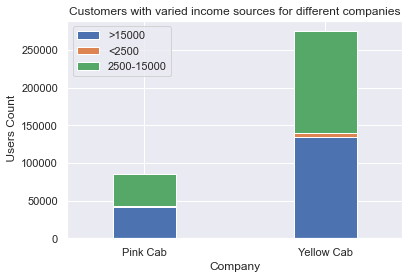

In [190]:
import pandas as pd
data3 = merged_data[(merged_data['Income_(USD/Month)']>2500) & (merged_data['Income_(USD/Month)']<15000)].groupby(['Company'])['Users'].count()

data1 = merged_data[(merged_data['Income_(USD/Month)']<2500)].groupby(['Company'])['Users'].count()
data2 = merged_data[(merged_data['Income_(USD/Month)']>15000)].groupby(['Company'])['Users'].count()

df=pd.DataFrame({'>15000':data2, '<2500':data1, '2500-15000':data3})
ax = df.plot(kind='bar', stacked=True, width = 0.35)
'''
for bar in ax.patches:
    height = bar.get_height()
    width = bar.get_width()
    x = bar.get_x()
    y = bar.get_y()
    label_text = height
    label_x = x + width / 2
    label_y = y + height / 2
    ax.text(label_x, label_y, label_text, ha='center',    
            va='center')
    '''
plt.xticks(rotation=360)
plt.ylabel(' Users Count')
plt.xlabel("Company")
plt.title("Customers with varied income sources for different companies")
plt.show()

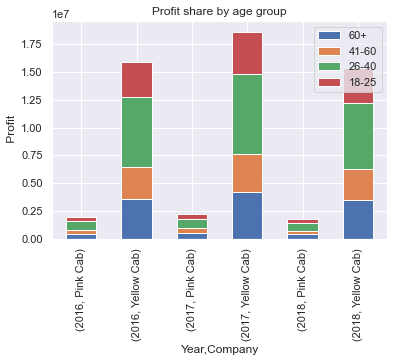

In [191]:
import pandas as pd
data3 = merged_data[(merged_data['Age']>18) & (merged_data['Age']<=25)].groupby(['Year','Company'])['Profit'].sum()

data1 = merged_data[(merged_data['Age']>26) & (merged_data['Age']<=40)].groupby(['Year','Company'])['Profit'].sum()
data2 = merged_data[(merged_data['Age']>41) & (merged_data['Age']<=60)].groupby(['Year','Company'])['Profit'].sum()
data4 = merged_data[(merged_data['Age']>41)].groupby(['Year','Company'])['Profit'].sum()
df=pd.DataFrame({'60+':data4,'41-60':data2,'26-40':data1,'18-25':data3 })
ax = df.plot(kind='bar', stacked=True, width = 0.55)
'''
for bar in ax.patches:
    height = bar.get_height()
    width = bar.get_width()
    x = bar.get_x()
    y = bar.get_y()
    label_text = height
    label_x = x + width / 2
    label_y = y + height / 2
    ax.text(label_x, label_y, label_text, ha='center',    
            va='center')
    '''
#ax.set_xticklabels(Class,rotation='horizontal')
plt.title("Profit share by age group")
plt.ylabel(' Profit')
plt.show()

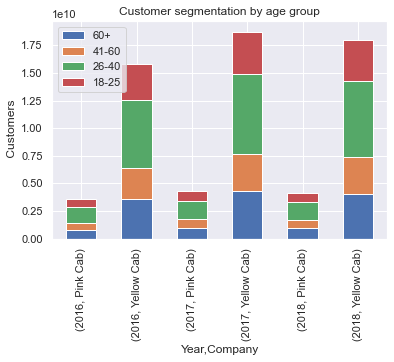

In [192]:
import pandas as pd
data3 = merged_data[(merged_data['Age']>18) & (merged_data['Age']<=25)].groupby(['Year','Company'])['Users'].sum()

data1 = merged_data[(merged_data['Age']>26) & (merged_data['Age']<=40)].groupby(['Year','Company'])['Users'].sum()
data2 = merged_data[(merged_data['Age']>41) & (merged_data['Age']<=60)].groupby(['Year','Company'])['Users'].sum()
data4 = merged_data[(merged_data['Age']>41)].groupby(['Year','Company'])['Users'].sum()
df=pd.DataFrame({'60+':data4,'41-60':data2,'26-40':data1,'18-25':data3 })
ax = df.plot(kind='bar', stacked=True, width = 0.55)
'''
for bar in ax.patches:
    height = bar.get_height()
    width = bar.get_width()
    x = bar.get_x()
    y = bar.get_y()
    label_text = height
    label_x = x + width / 2
    label_y = y + height / 2
    ax.text(label_x, label_y, label_text, ha='center',    
            va='center')
    '''
#ax.set_xticklabels(Class,rotation='horizontal')
plt.title("Customer segmentation by age group")
plt.ylabel(' Customers')
plt.show()

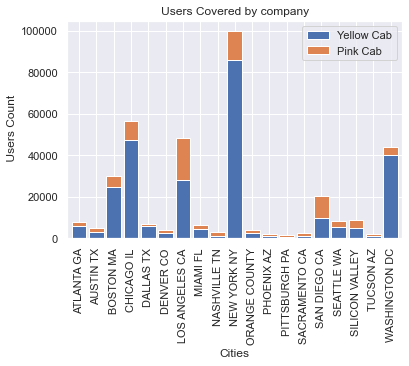

In [193]:
import pandas as pd
data1 = merged_data[(merged_data['Company']=="Yellow Cab")].groupby(['City'])['Users'].count()
data2 = merged_data[(merged_data['Company']=="Pink Cab")].groupby(['City'])['Users'].count()
df=pd.DataFrame({'Yellow Cab':data1, 'Pink Cab':data2})
ax = df.plot(kind='bar', stacked=True, width = 0.85)
'''
for bar in ax.patches:
    height = bar.get_height()
    width = bar.get_width()
    x = bar.get_x()
    y = bar.get_y()
    label_text = height
    label_x = x + width / 2
    label_y = y + height / 2
    ax.text(label_x, label_y, label_text, ha='center',    
            va='center')
    '''
plt.xticks(rotation=90)
plt.ylabel(' Users Count')
plt.xlabel("Cities")
plt.title("Users Covered by company")
plt.show()

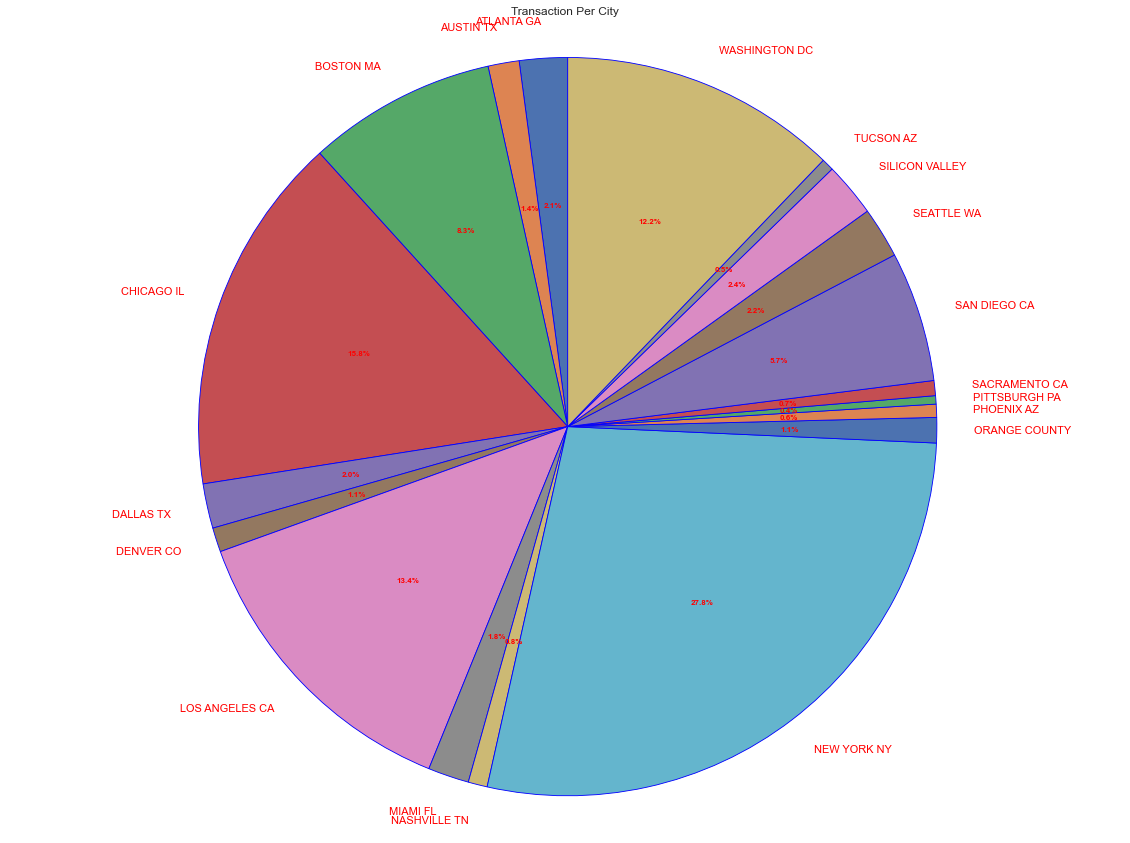

In [194]:
cities = merged_data.groupby("City").Transaction_ID.count()
labs = cities.index
vals  = cities.values
wp = { 'linewidth' : 0.85, 'edgecolor' : "Blue" }
figp , axs =plt.subplots(figsize=(20,15))
wedges, texts, autotexts = axs.pie(vals,labels=labs,autopct="%1.1f%%",startangle=90,wedgeprops = wp,
                                  textprops = dict(color ="Red"))
  
plt.setp(autotexts, size = 8, weight ="bold")
axs.axis('equal')
plt.title("Transaction Per City")
plt.show()

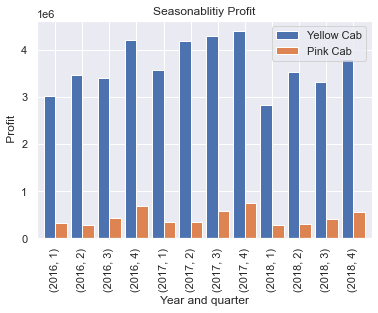

In [195]:
# merged_data[(merged_data['Company']=="Yellow Cab")].groupby(['Year','Quarter'])['Profit'].sum()
    
import pandas as pd
data1 = merged_data[(merged_data['Company']=="Yellow Cab")].groupby(['Year','Quarter'])['Profit'].sum()
data2 = merged_data[(merged_data['Company']=="Pink Cab")].groupby(['Year','Quarter'])['Profit'].sum()
df=pd.DataFrame({'Yellow Cab':data1, 'Pink Cab':data2})
ax = df.plot(kind='bar', stacked=False, width = 0.85)
'''
for bar in ax.patches:
    height = bar.get_height()
    width = bar.get_width()
    x = bar.get_x()
    y = bar.get_y()
    label_text = height
    label_x = x + width / 2
    label_y = y + height / 2
    ax.text(label_x, label_y, label_text, ha='center',    
            va='center')
    '''
plt.xticks(rotation=90)
plt.ylabel(' Profit')
plt.xlabel("Year and quarter")
plt.title("Seasonablitiy Profit")
plt.show()

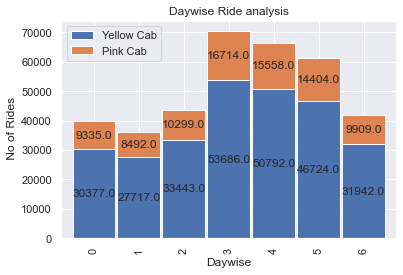

In [196]:

import pandas as pd
data1 = merged_data[merged_data['Company']=="Yellow Cab"].groupby(['Day_week'])["Transaction_ID"].count()
data2 = merged_data[merged_data['Company']=="Pink Cab"].groupby(['Day_week'])["Transaction_ID"].count()
df=pd.DataFrame({'Yellow Cab':data1, 'Pink Cab':data2})
ax = df.plot(kind='bar', stacked=True, width = 0.95)

for bar in ax.patches:
    height = bar.get_height()
    width = bar.get_width()
    x = bar.get_x()
    y = bar.get_y()
    label_text = height
    label_x = x + width / 2
    label_y = y + height / 2
    ax.text(label_x, label_y, label_text, ha='center',    
            va='center')
    
plt.xticks()
plt.ylabel(' No of Rides')
plt.xlabel("Daywise")
plt.title("Daywise Ride analysis")
plt.show()

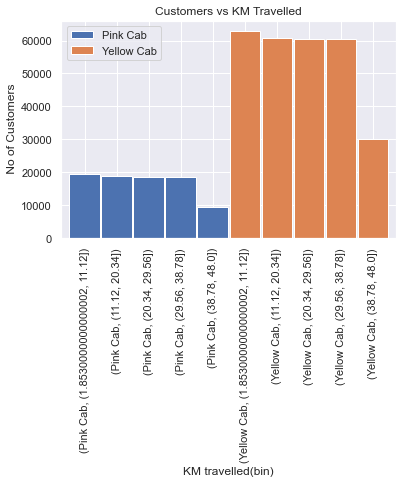

In [197]:

import pandas as pd
data1 = merged_data[merged_data['Company']=="Pink Cab"].groupby(['Company'])["KM_Travelled"].value_counts(bins=5)
data2 = merged_data[merged_data['Company']=="Yellow Cab"].groupby(['Company'])["KM_Travelled"].value_counts(bins=5)
df=pd.DataFrame({'Pink Cab':data1, 'Yellow Cab':data2})
ax = df.plot(kind='bar', stacked=True, width = 0.95)

plt.xticks()
plt.ylabel(' No of Customers')
plt.xlabel("KM travelled(bin)")
plt.title("Customers vs KM Travelled")
plt.show()

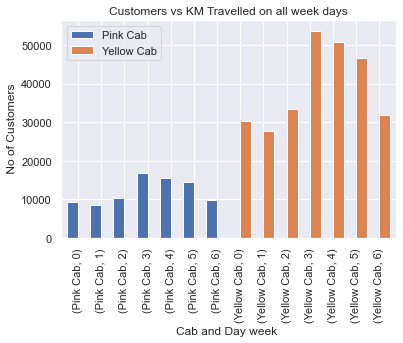

In [198]:
import pandas as pd
data1 = merged_data[merged_data['Company']=="Pink Cab"].groupby(['Company','Day_week'])["KM_Travelled"].count()
data2 = merged_data[merged_data['Company']=="Yellow Cab"].groupby(['Company','Day_week'])["KM_Travelled"].count()
df=pd.DataFrame({'Pink Cab':data1, 'Yellow Cab':data2})
ax = df.plot(kind='bar', stacked=False, width = 0.95)

plt.xticks()
plt.ylabel(' No of Customers')
plt.xlabel("Cab and Day week ")
plt.title("Customers vs KM Travelled on all week days")
plt.show()

In [142]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359392 entries, 0 to 359391
Data columns (total 24 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   City                359392 non-null  object        
 1   Population          359392 non-null  int64         
 2   Users               359392 non-null  int64         
 3   Transaction_ID      359392 non-null  int64         
 4   Date_of_Travel      359392 non-null  datetime64[ns]
 5   Company             359392 non-null  object        
 6   KM_Travelled        359392 non-null  float64       
 7   Price_Charged       359392 non-null  float64       
 8   Cost_of_Trip        359392 non-null  float64       
 9   Customer_ID         359392 non-null  int64         
 10  Payment_Mode        359392 non-null  object        
 11  Gender              359392 non-null  object        
 12  Age                 359392 non-null  int64         
 13  Income_(USD/Month)  359392 no

In [143]:
merged_data.groupby(['Year','Company'])['Profit'].sum()

Year  Company   
2016  Pink Cab      1.739883e+06
      Yellow Cab    1.407389e+07
2017  Pink Cab      2.015101e+06
      Yellow Cab    1.646427e+07
2018  Pink Cab      1.552345e+06
      Yellow Cab    1.348222e+07
Name: Profit, dtype: float64

Text(0.5, 1.0, 'City wise profits per company')

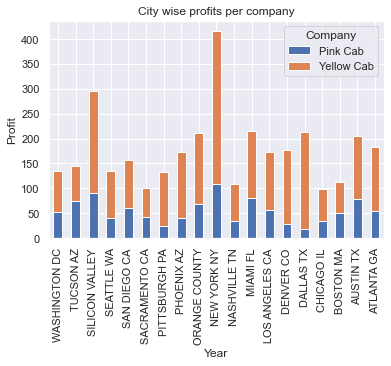

In [144]:
yearlyProfit=merged_data.groupby(['City','Company'])['Profit'].mean().unstack().fillna(0)
yearlyProfit=pd.DataFrame(yearlyProfit)
yearlyProfit=yearlyProfit.sort_values(by='City',ascending=False)
# plt.figure(figsize=(10,10))

yearlyProfit.plot(kind= 'bar', stacked= True)
plt.xticks()
plt.ylabel('Profit')
plt.xlabel("Year")
plt.title("City wise profits per company")

In [145]:
#profit per company per month
merged_data.groupby(['Month','Company'])['Profit'].mean()

Month  Company   
1      Pink Cab       59.431846
       Yellow Cab    176.266030
2      Pink Cab       72.667031
       Yellow Cab    180.784571
3      Pink Cab       64.832096
       Yellow Cab    168.500047
4      Pink Cab       59.232395
       Yellow Cab    174.635166
5      Pink Cab       48.518816
       Yellow Cab    190.123599
6      Pink Cab       49.940337
       Yellow Cab    175.324581
7      Pink Cab       53.202882
       Yellow Cab    145.960108
8      Pink Cab       55.515657
       Yellow Cab    134.693266
9      Pink Cab       64.199885
       Yellow Cab    163.333468
10     Pink Cab       63.096018
       Yellow Cab    142.516613
11     Pink Cab       65.374408
       Yellow Cab    143.367239
12     Pink Cab       84.956324
       Yellow Cab    152.053092
Name: Profit, dtype: float64

Text(0.5, 1.0, 'Day vs No of rides')

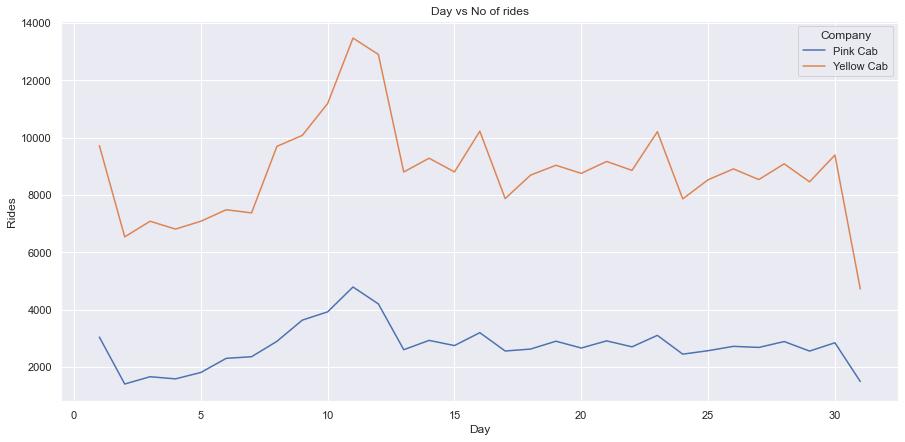

In [146]:
#day vs rides
fig, ax = plt.subplots(figsize=(15,7))
merged_data.groupby(['Day','Company'])['Users'].count().unstack().plot(ax=ax)
plt.ylabel("Rides")
plt.title("Day vs No of rides")

In [147]:
merged_data.groupby(['Company','Day_week'])['Profit'].sum().sort_values(ascending=False)

Company     Day_week
Yellow Cab  3           8.820783e+06
            4           8.451216e+06
            5           8.204281e+06
            2           4.944856e+06
            6           4.845078e+06
            0           4.677802e+06
            1           4.076357e+06
Pink Cab    3           1.103807e+06
            4           1.030196e+06
            5           1.025892e+06
            6           5.659513e+05
            2           5.624414e+05
            0           5.472822e+05
            1           4.717588e+05
Name: Profit, dtype: float64

In [149]:
city['User/Pop']=(city['Users']/city['Population'])*100
city

,City,Population,Users,User/Pop
0,NEW YORK NY,8405837,302149,3.594514
1,CHICAGO IL,1955130,164468,8.412126
2,LOS ANGELES CA,1595037,144132,9.036279
3,MIAMI FL,1339155,17675,1.319862
4,SILICON VALLEY,1177609,27247,2.313756
5,ORANGE COUNTY,1030185,12994,1.261327
6,SAN DIEGO CA,959307,69995,7.296413
7,PHOENIX AZ,943999,6133,0.649683
8,DALLAS TX,942908,22157,2.349858
9,ATLANTA GA,814885,24701,3.031225


<AxesSubplot:xlabel='City', ylabel='User/Pop'>

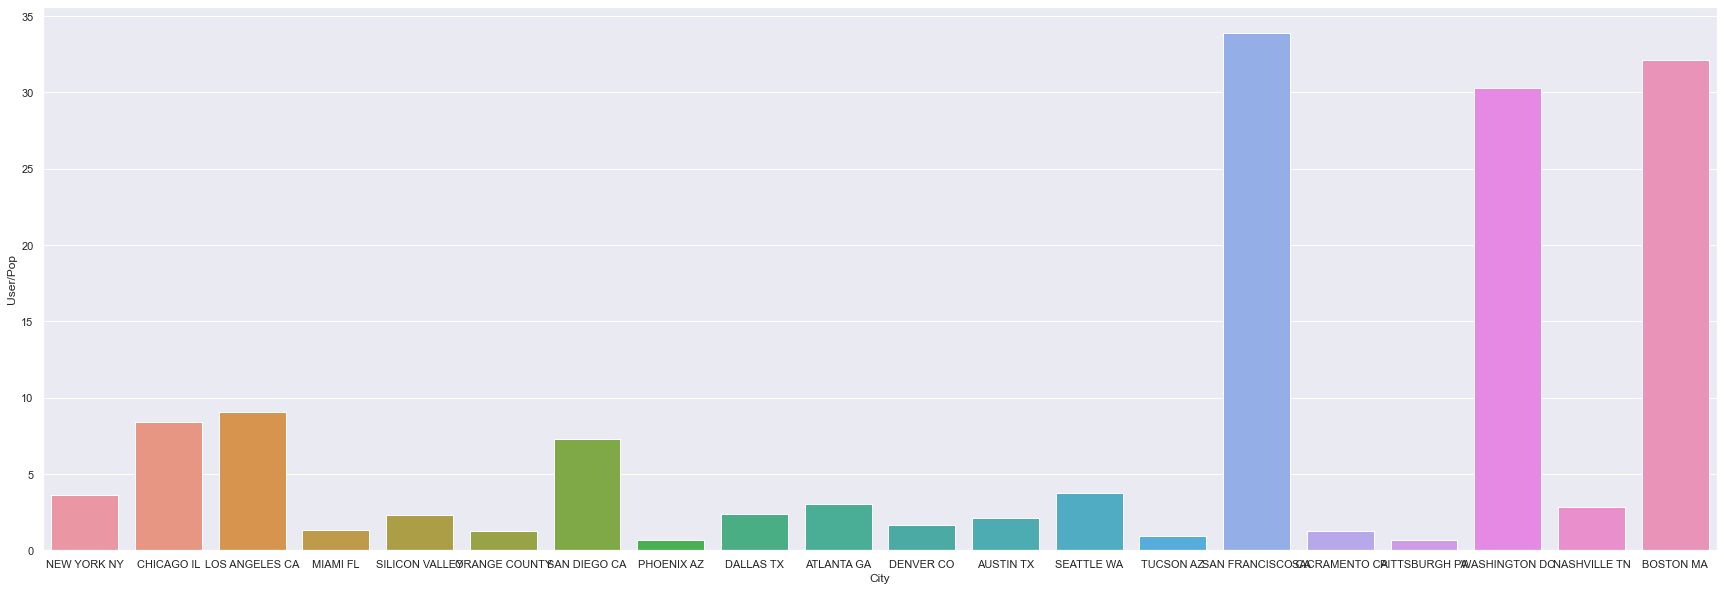

In [150]:
plt.figure(figsize=(30,10))
plt.xticks()
sns.barplot(x=city['City'],y=city['User/Pop'])

In [153]:
high=merged_data[(merged_data['Income_(USD/Month)']>=25000)].groupby(['Company'])['Year'].sum()
low=merged_data[(merged_data['Income_(USD/Month)']<15000)].groupby(['Company'])['Year'].sum()

_, p_value = stats.ttest_ind(a=high.values,b=low.values,equal_var=True)
if(p_value<0.05):
    print('We accept alternate hyothesis that the higher the population the higher the number of users')
else:
    print('We accept null hypothesis that the higher the population the higher the users')
    
print('P value is ', p_value)

We accept null hypothesis that the higher the population the higher the users
P value is  0.2664038337675313


In [154]:
high

Company
Pink Cab      15738954
Yellow Cab    50639770
Name: Year, dtype: int64

In [155]:
low

Company
Pink Cab       87245576
Yellow Cab    283624113
Name: Year, dtype: int64

In [156]:
high=merged_data[(merged_data['Population']>=1595037)].groupby(['City'])['Users'].sum()
low=merged_data[(merged_data['Population']<1595037)].groupby(['City'])['Users'].sum()

_, p_value = stats.ttest_ind(a=high.values,b=low.values,equal_var=True)
if(p_value<0.05):
    print('We accept alternate hyothesis that the higher the population the higher the number of users')
else:
    print('We accept null hypothesis that the higher the population the higher the users')
    
print('P value is ', p_value)

We accept alternate hyothesis that the higher the population the higher the number of users
P value is  8.476461176471075e-05


In [157]:
high

City
CHICAGO IL         9313000500
LOS ANGELES CA     6923092356
NEW YORK NY       30180152865
Name: Users, dtype: int64

In [158]:
low

City
ATLANTA GA         186665457
AUSTIN TX           73332288
BOSTON MA         2375983532
DALLAS TX          155475669
DENVER CO           47510325
MIAMI FL           114074450
NASHVILLE TN        27902700
ORANGE COUNTY       51742108
PHOENIX AZ          12658512
PITTSBURGH PA        4783259
SACRAMENTO CA       16673148
SAN DIEGO CA      1434057560
SEATTLE WA         200428811
SILICON VALLEY     232117193
TUCSON AZ           11029872
WASHINGTON DC     5554642737
Name: Users, dtype: int64

In [159]:
#payments
high=merged_data[(merged_data['Payment_Mode']=="Card")].groupby(['Transaction_ID'])['Price_Charged'].sum()
low=merged_data[(merged_data['Payment_Mode']=="Cash")].groupby(['Transaction_ID'])['Price_Charged'].sum()

_, p_value = stats.ttest_ind(a=high.values,b=low.values,equal_var=True)
if(p_value<0.05):
    print('We accept alternate hypothesis that Cards are used for trips that cost more')
else:
    print('We accept null hypothesis that Cards are not used for trips that cost more')
    
print('P value is ', p_value)

We accept null hypothesis that Cards are not used for trips that cost more
P value is  0.8919986499028361


In [160]:
high

Transaction_ID
10000011    370.95
10000012    358.52
10000015    114.62
10000017    576.15
10000018    466.10
             ...  
10440096    458.64
10440099    202.70
10440100    452.19
10440106    146.19
10440107    191.58
Name: Price_Charged, Length: 215504, dtype: float64

In [161]:
low

Transaction_ID
10000013    125.20
10000014    377.40
10000016     72.43
10000019    191.61
10000020    156.98
             ...  
10440097    167.09
10440098    358.77
10440101     69.24
10440104    113.75
10440105    437.07
Name: Price_Charged, Length: 143888, dtype: float64

In [162]:
high=merged_data[(merged_data['Price_Charged']>386)].groupby(['Price_Charged'])['Profit'].sum()
low=merged_data[(merged_data['Price_Charged']<386)].groupby(['Price_Charged'])['Profit'].sum()

_, p_value = stats.ttest_ind(a=high.values,b=low.values,equal_var=True)
if(p_value<0.05):
    print('We accept alternate hypothesis that the higher the cost of trip the higher the profit')
else:
    print('We accept null hypothesis that the lower the cost of trip the higher the profit')
    
print('P value is ', p_value)

We accept alternate hypothesis that the higher the cost of trip the higher the profit
P value is  0.0


In [163]:
high

Price_Charged
386.01      207.6228
386.02     1023.7114
386.03      539.9532
386.04      739.9632
386.05      679.9916
             ...    
1981.05    1424.1408
1993.83    1399.1100
2013.95    1433.3420
2016.70    1445.2720
2048.03    1463.9660
Name: Profit, Length: 63021, dtype: float64

In [164]:
low

Price_Charged
15.60      -5.7840
15.75      -9.0300
16.38      -3.0000
16.53      -2.6700
16.76      -3.2220
            ...   
385.95    325.0428
385.96    157.8656
385.97    284.5012
385.98    -26.4948
385.99    326.9670
Name: Profit, Length: 36154, dtype: float64

In [165]:
high=merged_data[(merged_data['KM_Travelled']>22)].groupby(['KM_Travelled'])['Profit'].sum()
low=merged_data[(merged_data['KM_Travelled']<22)].groupby(['KM_Travelled'])['Profit'].sum()

_, p_value = stats.ttest_ind(a=high.values,b=low.values,equal_var=True)
if(p_value<0.05):
    print('We accept alternate hypothesis that the longer the distance of the  trip the higher the profit')
else:
    print('We accept null hypothesis that the shorter the distance of the trip the higher the profit')
    
print('P value is ', p_value)

We accept alternate hypothesis that the longer the distance of the  trip the higher the profit
P value is  1.4643646709969495e-124


In [166]:
high

KM_Travelled
22.04     43960.6556
22.05     50827.9810
22.08     40142.2220
22.20     45738.2700
22.22     41147.1556
            ...     
46.41    100135.1454
46.80    203355.5160
47.20    115672.7500
47.60    111086.0740
48.00    104190.3500
Name: Profit, Length: 431, dtype: float64

In [167]:
low

KM_Travelled
1.90       4029.8620
1.92       4132.3436
1.94       4173.1776
1.96       4554.1028
1.98       4794.3284
            ...     
21.66     47793.4796
21.78     47706.7704
21.80     46868.1320
21.84     35466.2708
21.85    102708.7500
Name: Profit, Length: 442, dtype: float64

In [168]:
#cities dominated by two cab companies

high=merged_data[(merged_data['Company']=="Yellow Cab")].groupby(['City'])['Profit'].sum()
low=merged_data[(merged_data['Company']=="Pink Cab")].groupby(['City'])['Profit'].sum()

_, p_value = stats.ttest_ind(a=high.values,b=low.values,equal_var=True)
if(p_value<0.05):
    print('We accept alternate hypothesis that different cities are dominated by different companies')
else:
    print('We accept null hypothesis that that different cities are not dominated by a different company')
    
print('P value is ', p_value)

We accept null hypothesis that that different cities are not dominated by a different company
P value is  0.14465210120118369


In [169]:
high

City
ATLANTA GA        7.463828e+05
AUSTIN TX         3.792557e+05
BOSTON MA         1.506718e+06
CHICAGO IL        3.068591e+06
DALLAS TX         1.104003e+06
DENVER CO         3.570001e+05
LOS ANGELES CA    3.285977e+06
MIAMI FL          5.960001e+05
NASHVILLE TN      8.524768e+04
NEW YORK NY       2.645108e+07
ORANGE COUNTY     3.550060e+05
PHOENIX AZ        1.573445e+05
PITTSBURGH PA     6.805822e+04
SACRAMENTO CA     6.200218e+04
SAN DIEGO CA      9.492737e+05
SEATTLE WA        4.919035e+05
SILICON VALLEY    9.764547e+05
TUCSON AZ         8.097112e+04
WASHINGTON DC     3.299104e+06
Name: Profit, dtype: float64

In [170]:
low

City
ATLANTA GA          96050.076
AUSTIN TX          147445.290
BOSTON MA          262001.698
CHICAGO IL         318722.488
DALLAS TX           24730.112
DENVER CO           40584.939
LOS ANGELES CA    1125732.065
MIAMI FL           162301.191
NASHVILLE TN        64284.534
NEW YORK NY       1511474.388
ORANGE COUNTY      101995.833
PHOENIX AZ          35596.394
PITTSBURGH PA       17107.738
SACRAMENTO CA       55324.012
SAN DIEGO CA       637889.769
SEATTLE WA         112781.335
SILICON VALLEY     340250.531
TUCSON AZ           59289.575
WASHINGTON DC      193766.353
Name: Profit, dtype: float64

In [171]:
#profits specific to 2 quarters
high=merged_data[(merged_data['Quarter']==3) | (merged_data['Quarter']==4)].groupby(['Quarter'])['Profit'].sum()
low=merged_data[(merged_data['Quarter']==2) | (merged_data['Quarter']==1)].groupby(['Quarter'])['Profit'].sum()

_, p_value = stats.ttest_ind(a=high.values,b=low.values,equal_var=True)
if(p_value>0.05):
    print('We accept alternate hypothesis that profits are higher in the last two quarters')
else:
    print('We accept null hypothesis that the profits are lower in the last two quarters')
    
print('P value is ', p_value)

We accept alternate hypothesis that profits are higher in the last two quarters
P value is  0.2423290978912571


In [172]:
high

Quarter
3    1.242927e+07
4    1.438175e+07
Name: Profit, dtype: float64

In [173]:
low

Quarter
1    1.038812e+07
2    1.212857e+07
Name: Profit, dtype: float64

In [174]:
high=merged_data[(merged_data['Day_week']==5) | (merged_data['Day_week']==6 )].groupby(['Day_week'])['KM_Travelled'].mean()
low=merged_data[(merged_data['Day_week']!=5) | (merged_data['Day_week']!=6)].groupby(['Day_week'])['KM_Travelled'].mean()

_, p_value = stats.ttest_ind(a=high.values,b=low.values,equal_var=True)
if(p_value<0.05):
    print('We accept alternate hyothesis that users on average  travel more on on paricular times of the week')
else:
    print('We accept null hypothesis that the users on average travel the same regardless of the day of week')
    
print('P value is ', p_value)

We accept null hypothesis that the users on average travel the same regardless of the day of week
P value is  0.6688373674673522


In [175]:
high

Day_week
5    22.600371
6    22.467666
Name: KM_Travelled, dtype: float64

In [176]:
low

Day_week
0    22.613886
1    22.492520
2    22.525932
3    22.601038
4    22.603830
5    22.600371
6    22.467666
Name: KM_Travelled, dtype: float64

In [177]:
high=merged_data[(merged_data['Age']>35) ].groupby(['Age'])['Income_(USD/Month)'].mean()
low=merged_data[(merged_data['Age']<35)].groupby(['Age'])['Income_(USD/Month)'].mean()

_, p_value = stats.ttest_ind(a=high.values,b=low.values,equal_var=True)
if(p_value<0.05):
    print('We accept alternate hyothesis that the older you get the more you income you earn')
else:
    print('We accept null hypothesis that age does not affect income earnings')
    
print('P value is ', p_value)

We accept null hypothesis that age does not affect income earnings
P value is  0.5959357388889042


In [178]:
high

Age
36    14820.639045
37    14935.443532
38    15279.539611
39    14803.957535
40    15322.262829
41    15037.353583
42    15267.277582
43    14791.964949
44    13589.974228
45    15070.394068
46    15098.381062
47    15921.856619
48    15300.495405
49    14418.510582
50    15106.645146
51    15488.610277
52    15642.129757
53    15914.796484
54    15486.252756
55    16204.590064
56    15367.160342
57    15509.325655
58    14863.849769
59    15169.719272
60    13442.733775
61    15082.159596
62    14738.510482
63    15203.425931
64    15192.488997
65    14822.581533
Name: Income_(USD/Month), dtype: float64

In [179]:
low

Age
18    14464.733542
19    15054.463636
20    15525.407229
21    14727.257020
22    15204.666328
23    15178.889835
24    15235.124114
25    14921.252568
26    14860.173402
27    14527.868495
28    15365.240885
29    15381.830258
30    15633.302284
31    14640.433120
32    14858.851493
33    15167.050624
34    14484.427992
Name: Income_(USD/Month), dtype: float64

In [180]:
high=merged_data[(merged_data['Year']==2018)].Year.value_counts()
low=merged_data[(merged_data['Year']==2017)].Year.value_counts()

_, p_value = stats.ttest_ind(a=high.values,b=low.values,equal_var=True)
if(p_value<0.05):
    print('We accept alternate hyothesis that there has been an increase in the demand for cab use in the years')
else:
    print('We accept null hypothesis that there has not been an increase in demand for cabs in the years')
    
print('P value is ', p_value)

We accept null hypothesis that there has not been an increase in demand for cabs in the years
P value is  nan


C:\Users\prani\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3702: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\prani\anaconda3\lib\site-packages\numpy\core\_methods.py:253: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [181]:
high

2018    123206
Name: Year, dtype: int64

In [182]:
low

2017    127964
Name: Year, dtype: int64

In [185]:
high=merged_data[(merged_data['Company']=="Yellow Cab")].groupby(['Quarter'])['Users'].sum()
low=merged_data[(merged_data['Company']=="Pink Cab")].groupby(['Quarter'])['Users'].sum()

_, p_value = stats.ttest_ind(a=high.values,b=low.values,equal_var=True)
if(p_value<0.05):
    print('We accept alternate hypothesis that different cities are dominated by different companies')
else:
    print('We accept null hypothesis that that different cities are not dominated by a different company')
    
print('P value is ', p_value)

We accept alternate hypothesis that different cities are dominated by different companies
P value is  0.0005106438105102132


In [186]:
high

Quarter
1     8926025871
2    10309384684
3    12428898115
4    14612091284
Name: Users, dtype: int64

In [187]:
low

Quarter
1    1760940884
2    2131795318
3    3093424181
4    3652763005
Name: Users, dtype: int64

In [ ]:
Recommendations:
    
    Number of Customers: Yellow cab has higher customer reach in 20 cities while pink cab has only in 4 cities
    Customer Retention: Yellow Cab has the highest customer retention ratio
    Age wise Reach: Yellow cab has customers in all age groups and it’s been observed that it’s even popular in the 60+ age group as equally as it’s in the 18-25 age group
    Average Profit per KM: Yellow cab’s average profit per KM is almost three times that of the pink cab
    Income wise Reach: yellow cab is offering their services to all the three-income class group
    Profit/KM Forecasting: Based on 2019 profit, pink cab’s profit has scope to improve while yellow cab’s profit is expected to fall based on average profit and loss rates

On analyzing the given dataset, we will suggest to invest XYZ company to invest in yellow cab.
    
    